In [135]:
## Import libraries
import pandas as pd
import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
## Lab | Customer Analysis Round 2
## marketing_customer_analysis.csv file
## Note: For the next labs we will be using the same data file. Please save the code, so that you can re-use it later in the labs following this lab.

In [4]:
## Read the three files into python as dataframes
df = pd.read_csv("lab-customer-analysis-round-2-master/lab-customer-analysis-round-2-master/files_for_lab/csv_files/marketing_customer_analysis.csv")
df

Unnamed: 0 Customer       State  Customer Lifetime Value Response  \
0               0  DK49336     Arizona              4809.216960       No   
1               1  KX64629  California              2228.525238       No   
2               2  LZ68649  Washington             14947.917300       No   
3               3  XL78013      Oregon             22332.439460      Yes   
4               4  QA50777      Oregon              9025.067525       No   
...           ...      ...         ...                      ...      ...   
10905       10905  FE99816      Nevada             15563.369440       No   
10906       10906  KX53892      Oregon              5259.444853       No   
10907       10907  TL39050     Arizona             23893.304100       No   
10908       10908  WA60547  California             11971.977650       No   
10909       10909  IV32877         NaN              6857.519928      NaN   

       Coverage Education Effective To Date EmploymentStatus Gender  ...  \
0         Basic   College           2/18/11         Employed      M  ...   
1         Basic   College           1/18/11       Unemployed      F  ...   
2         Basic  Bachelor           2/10/11         Employed      M  ...   
3      Extended   College           1/11/11         Employed      M  ...   
4       Premium  Bachelor           1/17/11    Medical Leave      F  ...   
...         ...       ...               ...              ...    ...  ...   
10905   Premium  Bachelor           1/19/11       Unemployed      F  ...   
10906     Basic   College            1/6/11         Employed      F  ...   
10907  Extended  Bachelor            2/6/11         Employed      F  ...   
10908   Premium   College           2/13/11         Employed      F  ...   
10909     Basic  Bachelor            1/8/11       Unemployed      M  ...   

       Number of Open Complaints Number of Policies     Policy Type  \
0                            0.0                  9  Corporate Auto   
1                            0.0                  1   Personal Auto   
2                            0.0                  2   Personal Auto   
3                            0.0                  2  Corporate Auto   
4                            NaN                  7   Personal Auto   
...                          ...                ...             ...   
10905                        NaN                  7   Personal Auto   
10906                        0.0                  6   Personal Auto   
10907                        0.0                  2  Corporate Auto   
10908                        4.0                  6   Personal Auto   
10909                        0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car   

In [5]:
## Show the dataframe shape
df.shape

(10910, 26)

In [6]:
## Standardize header names
df.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

In [7]:
df = df.drop(columns=["Unnamed: 0"]) 
df

Customer       State  Customer Lifetime Value Response  Coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
1      KX64629  California              2228.525238       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
...        ...         ...                      ...      ...       ...   
10905  FE99816      Nevada             15563.369440       No   Premium   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   
10909  IV32877         NaN              6857.519928      NaN     Basic   

      Education Effective To Date EmploymentStatus Gender  Income  ...  \
0       College           2/18/11         Employed      M   48029  ...   
1       College           1/18/11       Unemployed      F       0  ...   
2      Bachelor           2/10/11         Employed      M   22139  ...   
3       College           1/11/11         Employed      M   49078  ...   
4      Bachelor           1/17/11    Medical Leave      F   23675  ...   
...         ...               ...              ...    ...     ...  ...   
10905  Bachelor           1/19/11       Unemployed      F       0  ...   
10906   College            1/6/11         Employed      F   61146  ...   
10907  Bachelor            2/6/11         Employed      F   39837  ...   
10908   College           2/13/11         Employed      F   64195  ...   
10909  Bachelor            1/8/11       Unemployed      M       0  ...   

      Number of Open Complaints Number of Policies     Policy Type  \
0                           0.0                  9  Corporate Auto   
1                           0.0                  1   Personal Auto   
2                           0.0                  2   Personal Auto   
3                           0.0                  2  Corporate Auto   
4                           NaN                  7   Personal Auto   
...                         ...                ...             ...   
10905                       NaN                  7   Personal Auto   
10906                       0.0                  6   Personal Auto   
10907                       0.0                  2  Corporate Auto   
10908                       4.0                  6   Personal Auto   
10909                       0.0                  3   Personal Auto   

             Policy  Renew Offer Type  Sales Channel  Total Claim Amount  \
0      Corporate L3            Offer3          Agent          292.800000   
1       Personal L3            Offer4    Call Center          744.924331   
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
4       Personal L2            Offer1         Branch          707.925645   
...             ...               ...            ...                 ...   
10905   Personal L1            Offer3            Web         1214.400000   
10906   Personal L3            Offer2         Branch          273.018929   
10907  Corporate L3            Offer1            Web          381.306996   
10908   Personal L1            Offer1         Branch          618.288849   
10909   Personal L1            Offer4            Web         1021.719397   

       Vehicle Class Vehicle Size Vehicle Type  
0      Four-Door Car      Medsize          NaN  
1      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
...              ...          ...          ...  
10905     Luxury Car      Medsize            A  
10906  Four-Door Car      Medsize            A  
10907     Luxury SUV      Medsize

In [8]:
df.columns = df.columns.str.lower() # convert a Pandas DataFrame column to lowercase
df.head()

customer       state  customer lifetime value response  coverage education  \
0  DK49336     Arizona              4809.216960       No     Basic   College   
1  KX64629  California              2228.525238       No     Basic   College   
2  LZ68649  Washington             14947.917300       No     Basic  Bachelor   
3  XL78013      Oregon             22332.439460      Yes  Extended   College   
4  QA50777      Oregon              9025.067525       No   Premium  Bachelor   

  effective to date employmentstatus gender  income  ...  \
0           2/18/11         Employed      M   48029  ...   
1           1/18/11       Unemployed      F       0  ...   
2           2/10/11         Employed      M   22139  ...   
3           1/11/11         Employed      M   49078  ...   
4           1/17/11    Medical Leave      F   23675  ...   

  number of open complaints number of policies     policy type        policy  \
0                       0.0                  9  Corporate Auto  Corporate L3   
1                       0.0                  1   Personal Auto   Personal L3   
2                       0.0                  2   Personal Auto   Personal L3   
3                       0.0                  2  Corporate Auto  Corporate L3   
4                       NaN                  7   Personal Auto   Personal L2   

   renew offer type  sales channel  total claim amount  vehicle class  \
0            Offer3          Agent          292.800000  Four-Door Car   
1            Offer4    Call Center          744.924331  Four-Door Car   
2            Offer3    Call Center          480.000000            SUV   
3            Offer2         Branch          484.013411  Four-Door Car   
4            Offer1         Branch          707.925645  Four-Door Car   

  vehicle size vehicle type  
0      Medsize          NaN  
1      Medsize          NaN  
2      Medsize            A  
3      Medsize            A  
4      Medsize          NaN  

[5 rows x 25 columns]

In [9]:
## Which columns are numerical?
## Which columns are categorical?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10279 non-null  object 
 2   customer lifetime value        10910 non-null  float64
 3   response                       10279 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective to date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location code                  10910 non-null  object 
 11  marital status                 10910 non-null  object 
 12  monthly premium auto           10910 non-null 

In [10]:
df_numerical_variables = df.select_dtypes(include=['int64','float64'])
df_numerical_variables

customer lifetime value  income  monthly premium auto  \
0                  4809.216960   48029                    61   
1                  2228.525238       0                    64   
2                 14947.917300   22139                   100   
3                 22332.439460   49078                    97   
4                  9025.067525   23675                   117   
...                        ...     ...                   ...   
10905             15563.369440       0                   253   
10906              5259.444853   61146                    65   
10907             23893.304100   39837                   201   
10908             11971.977650   64195                   158   
10909              6857.519928       0                   101   

       months since last claim  months since policy inception  \
0                          7.0                             52   
1                          3.0                             26   
2                         34.0                             31   
3                         10.0                              3   
4                          NaN                             31   
...                        ...                            ...   
10905                      NaN                             40   
10906                      7.0                             68   
10907                     11.0                             63   
10908                      0.0                             27   
10909                     31.0                              1   

       number of open complaints  number of policies  total claim amount  
0                            0.0                   9          292.800000  
1                            0.0                   1          744.924331  
2                            0.0                   2          480.000000  
3                            0.0                   2          484.013411  
4                            NaN                   7          707.925645  
...                          ...                 ...                 ...  
10905                        NaN                   7         1214.400000  
10906                        0.0                   6          273.018929  
10907                        0.0                   2          381.306996  
10908                        4.0                   6          618.288849  
10909                        0.0                   3         1021.719397  

[10910 rows x 8 columns]

In [11]:
df_numerical_variables.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies',
       'total claim amount'],
      dtype='object')

In [12]:
df_categorical_variables = df.select_dtypes(include=['object'])
df_categorical_variables

customer       state response  coverage education effective to date  \
0      DK49336     Arizona       No     Basic   College           2/18/11   
1      KX64629  California       No     Basic   College           1/18/11   
2      LZ68649  Washington       No     Basic  Bachelor           2/10/11   
3      XL78013      Oregon      Yes  Extended   College           1/11/11   
4      QA50777      Oregon       No   Premium  Bachelor           1/17/11   
...        ...         ...      ...       ...       ...               ...   
10905  FE99816      Nevada       No   Premium  Bachelor           1/19/11   
10906  KX53892      Oregon       No     Basic   College            1/6/11   
10907  TL39050     Arizona       No  Extended  Bachelor            2/6/11   
10908  WA60547  California       No   Premium   College           2/13/11   
10909  IV32877         NaN      NaN     Basic  Bachelor            1/8/11   

      employmentstatus gender location code marital status     policy type  \
0             Employed      M      Suburban        Married  Corporate Auto   
1           Unemployed      F      Suburban         Single   Personal Auto   
2             Employed      M      Suburban         Single   Personal Auto   
3             Employed      M      Suburban         Single  Corporate Auto   
4        Medical Leave      F      Suburban        Married   Personal Auto   
...                ...    ...           ...            ...             ...   
10905       Unemployed      F      Suburban        Married   Personal Auto   
10906         Employed      F         Urban        Married   Personal Auto   
10907         Employed      F         Rural        Married  Corporate Auto   
10908         Employed      F         Urban       Divorced   Personal Auto   
10909       Unemployed      M      Suburban         Single   Personal Auto   

             policy renew offer type sales channel  vehicle class  \
0      Corporate L3           Offer3         Agent  Four-Door Car   
1       Personal L3           Offer4   Call Center  Four-Door Car   
2       Personal L3           Offer3   Call Center            SUV   
3      Corporate L3           Offer2        Branch  Four-Door Car   
4       Personal L2           Offer1        Branch  Four-Door Car   
...             ...              ...           ...            ...   
10905   Personal L1           Offer3           Web     Luxury Car   
10906   Personal L3           Offer2        Branch  Four-Door Car   
10907  Corporate L3           Offer1           Web     Luxury SUV   
10908   Personal L1           Offer1        Branch            SUV   
10909   Personal L1           Offer4           Web            SUV   

      vehicle size vehicle type  
0          Medsize          NaN  
1          Medsize          NaN  
2          Medsize            A  
3          Medsize            A  
4          Medsize          NaN  
...            ...          ...  
10905      Medsize            A  
10906      Medsize            A  
10907      Medsize          NaN  
10908      Medsize            A  
10909      Medsize          NaN  

[10910 rows x 17 columns]

In [13]:
df_categorical_variables.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'effective to date', 'employmentstatus', 'gender', 'location code',
       'marital status', 'policy type', 'policy', 'renew offer type',
       'sales channel', 'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [14]:
## Check and deal with NaN values
df.isnull().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [15]:
df.isna().sum()

customer                            0
state                             631
customer lifetime value             0
response                          631
coverage                            0
education                           0
effective to date                   0
employmentstatus                    0
gender                              0
income                              0
location code                       0
marital status                      0
monthly premium auto                0
months since last claim           633
months since policy inception       0
number of open complaints         633
number of policies                  0
policy type                         0
policy                              0
renew offer type                    0
sales channel                       0
total claim amount                  0
vehicle class                     622
vehicle size                      622
vehicle type                     5482
dtype: int64

In [16]:
df = df.dropna(subset=['state', 'response', 'months since last claim', 'number of open complaints', 'vehicle class', 'vehicle size', 'vehicle type']) # defining in which columns to look for missing values

In [17]:
df.shape

(4543, 25)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       4543 non-null   object 
 1   state                          4543 non-null   object 
 2   customer lifetime value        4543 non-null   float64
 3   response                       4543 non-null   object 
 4   coverage                       4543 non-null   object 
 5   education                      4543 non-null   object 
 6   effective to date              4543 non-null   object 
 7   employmentstatus               4543 non-null   object 
 8   gender                         4543 non-null   object 
 9   income                         4543 non-null   int64  
 10  location code                  4543 non-null   object 
 11  marital status                 4543 non-null   object 
 12  monthly premium auto           4543 non-null   int64

In [19]:
## Datetime format - Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter , ie. January, February and March. Hint: If data from March does not exist, consider only January and February.

In [20]:
df.head(5)

customer       state  customer lifetime value response  coverage  \
2   LZ68649  Washington             14947.917300       No     Basic   
3   XL78013      Oregon             22332.439460      Yes  Extended   
10  HG93801     Arizona              5154.764074       No  Extended   
13  KR82385  California              5454.587929       No     Basic   
16  FH51383  California              5326.677654       No     Basic   

               education effective to date employmentstatus gender  income  \
2               Bachelor           2/10/11         Employed      M   22139   
3                College           1/11/11         Employed      M   49078   
10  High School or Below            1/2/11         Employed      M   82730   
13                Master           1/26/11         Employed      M   66334   
16  High School or Below            2/7/11         Employed      F   76717   

    ... number of open complaints number of policies     policy type  \
2   ...                       0.0                  2   Personal Auto   
3   ...                       0.0                  2  Corporate Auto   
10  ...                       0.0                  1  Corporate Auto   
13  ...                       0.0                  4   Personal Auto   
16  ...                       0.0                  6   Personal Auto   

          policy  renew offer type  sales channel  total claim amount  \
2    Personal L3            Offer3    Call Center          480.000000   
3   Corporate L3            Offer2         Branch          484.013411   
10  Corporate L3            Offer2         Branch          442.521087   
13   Personal L3            Offer4    Call Center          331.200000   
16   Personal L3            Offer4    Call Center          300.528579   

    vehicle class vehicle size vehicle type  
2             SUV      Medsize            A  
3   Four-Door Car      Medsize            A  
10            SUV        Large            A  
13   Two-Door Car      Medsize            A  
16   Two-Door Car        Large            A  

[5 rows x 25 columns]

In [21]:
df['effective to date'] = pd.to_datetime(df['effective to date'])
df

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\1018130376.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective to date'] = pd.to_datetime(df['effective to date'])
C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\1018130376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effective to date'] = pd.to_datetime(df['effective to date'])


customer       state  customer lifetime value response  coverage  \
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
10     HG93801     Arizona              5154.764074       No  Extended   
13     KR82385  California              5454.587929       No     Basic   
16     FH51383  California              5326.677654       No     Basic   
...        ...         ...                      ...      ...       ...   
10902  PP30874  California              3579.023825       No  Extended   
10903  SU71163     Arizona              2771.663013       No     Basic   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10908  WA60547  California             11971.977650       No   Premium   

                  education effective to date employmentstatus gender  income  \
2                  Bachelor        2011-02-10         Employed      M   22139   
3                   College        2011-01-11         Employed      M   49078   
10     High School or Below        2011-01-02         Employed      M   82730   
13                   Master        2011-01-26         Employed      M   66334   
16     High School or Below        2011-02-07         Employed      F   76717   
...                     ...               ...              ...    ...     ...   
10902  High School or Below        2011-01-24         Employed      F   28304   
10903               College        2011-01-07         Employed      M   59855   
10904  High School or Below        2011-02-24       Unemployed      M       0   
10906               College        2011-01-06         Employed      F   61146   
10908               College        2011-02-13         Employed      F   64195   

       ... number of open complaints number of policies     policy type  \
2      ...                       0.0                  2   Personal Auto   
3      ...                       0.0                  2  Corporate Auto   
10     ...                       0.0                  1  Corporate Auto   
13     ...                       0.0                  4   Personal Auto   
16     ...                       0.0                  6   Personal Auto   
...    ...                       ...                ...             ...   
10902  ...                       2.0                  1   Personal Auto   
10903  ...                       4.0                  1   Personal Auto   
10904  ...                       0.0                  2   Personal Auto   
10906  ...                       0.0                  6   Personal Auto   
10908  ...                       4.0                  6   Personal Auto   

             policy  renew offer type  sales channel  total claim amount  \
2       Personal L3            Offer3    Call Center          480.000000   
3      Corporate L3            Offer2         Branch          484.013411   
10     Corporate L3            Offer2         Branch          442.521087   
13      Personal L3            Offer4    Call Center          331.200000   
16      Personal L3            Offer4    Call Center          300.528579   
...             ...               ...            ...                 ...   
10902   Personal L2            Offer2          Agent          655.200000   
10903   Personal L2            Offer2         Branch          355.200000   
10904   Personal L2            Offer1         Branch          897.600000   
10906   Personal L3            Offer2         Branch          273.018929   
10908   Personal L1            Offer1         Branch          618.288849   

       vehicle class vehicle size vehicle type  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
10               SUV        Large            A  
13      Two-Door Car      Medsize            A  
16      Two-Door Car        Large            A  
...              ...          ...   

In [22]:
df.info()   # "datetime64[ns]" is the new type of teh column "effective to date"

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer lifetime value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective to date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   int64         
 10  location code                  4543 non-null   object        
 11  marital status       

In [23]:
df['effective to date: month'] = df['effective to date'].dt.month   # Creating the new column "effective to date: month"
df.head()

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\2372460415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['effective to date: month'] = df['effective to date'].dt.month   # Creating the new column "effective to date: month"


customer       state  customer lifetime value response  coverage  \
2   LZ68649  Washington             14947.917300       No     Basic   
3   XL78013      Oregon             22332.439460      Yes  Extended   
10  HG93801     Arizona              5154.764074       No  Extended   
13  KR82385  California              5454.587929       No     Basic   
16  FH51383  California              5326.677654       No     Basic   

               education effective to date employmentstatus gender  income  \
2               Bachelor        2011-02-10         Employed      M   22139   
3                College        2011-01-11         Employed      M   49078   
10  High School or Below        2011-01-02         Employed      M   82730   
13                Master        2011-01-26         Employed      M   66334   
16  High School or Below        2011-02-07         Employed      F   76717   

    ... number of policies     policy type        policy  renew offer type  \
2   ...                  2   Personal Auto   Personal L3            Offer3   
3   ...                  2  Corporate Auto  Corporate L3            Offer2   
10  ...                  1  Corporate Auto  Corporate L3            Offer2   
13  ...                  4   Personal Auto   Personal L3            Offer4   
16  ...                  6   Personal Auto   Personal L3            Offer4   

    sales channel  total claim amount  vehicle class vehicle size  \
2     Call Center          480.000000            SUV      Medsize   
3          Branch          484.013411  Four-Door Car      Medsize   
10         Branch          442.521087            SUV        Large   
13    Call Center          331.200000   Two-Door Car      Medsize   
16    Call Center          300.528579   Two-Door Car        Large   

   vehicle type effective to date: month  
2             A                        2  
3             A                        1  
10            A                        1  
13            A                        1  
16            A                        2  

[5 rows x 26 columns]

In [24]:
unique_months = df['effective to date: month'].unique()  # when extracting the unique values of the column "effective to date: month", we realize that the array is [1,2]. In this case, there are only teh months January and February
unique_months

array([2, 1])

In [25]:
df_filtered = df[df["effective to date: month"] <= 3]   # in case we would like to filter the df considering only the the information when the column "effective to date: month" is qual or lower than 3
df_filtered

customer       state  customer lifetime value response  coverage  \
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
10     HG93801     Arizona              5154.764074       No  Extended   
13     KR82385  California              5454.587929       No     Basic   
16     FH51383  California              5326.677654       No     Basic   
...        ...         ...                      ...      ...       ...   
10902  PP30874  California              3579.023825       No  Extended   
10903  SU71163     Arizona              2771.663013       No     Basic   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10908  WA60547  California             11971.977650       No   Premium   

                  education effective to date employmentstatus gender  income  \
2                  Bachelor        2011-02-10         Employed      M   22139   
3                   College        2011-01-11         Employed      M   49078   
10     High School or Below        2011-01-02         Employed      M   82730   
13                   Master        2011-01-26         Employed      M   66334   
16     High School or Below        2011-02-07         Employed      F   76717   
...                     ...               ...              ...    ...     ...   
10902  High School or Below        2011-01-24         Employed      F   28304   
10903               College        2011-01-07         Employed      M   59855   
10904  High School or Below        2011-02-24       Unemployed      M       0   
10906               College        2011-01-06         Employed      F   61146   
10908               College        2011-02-13         Employed      F   64195   

       ... number of policies     policy type        policy  renew offer type  \
2      ...                  2   Personal Auto   Personal L3            Offer3   
3      ...                  2  Corporate Auto  Corporate L3            Offer2   
10     ...                  1  Corporate Auto  Corporate L3            Offer2   
13     ...                  4   Personal Auto   Personal L3            Offer4   
16     ...                  6   Personal Auto   Personal L3            Offer4   
...    ...                ...             ...           ...               ...   
10902  ...                  1   Personal Auto   Personal L2            Offer2   
10903  ...                  1   Personal Auto   Personal L2            Offer2   
10904  ...                  2   Personal Auto   Personal L2            Offer1   
10906  ...                  6   Personal Auto   Personal L3            Offer2   
10908  ...                  6   Personal Auto   Personal L1            Offer1   

       sales channel  total claim amount  vehicle class vehicle size  \
2        Call Center          480.000000            SUV      Medsize   
3             Branch          484.013411  Four-Door Car      Medsize   
10            Branch          442.521087            SUV        Large   
13       Call Center          331.200000   Two-Door Car      Medsize   
16       Call Center          300.528579   Two-Door Car        Large   
...              ...                 ...            ...          ...   
10902          Agent          655.200000  Four-Door Car      Medsize   
10903         Branch          355.200000   Two-Door Car      Medsize   
10904         Branch          897.600000     Luxury SUV      Medsize   
10906         Branch          273.018929  Four-Door Car      Medsize   
10908         Branch          618.288849            SUV      Medsize   

      vehicle type effective to date: month  
2                A                        2  
3                A                        1  
10               A                        1  
13               A                        1  
16               A                        2  
...            ...            

In [26]:
## BONUS: Put all the previously mentioned data transformations into a function.

def datetime_format(x):
    for x in df['effective to date']:
        return pd.to_datetime(x)
        
df["effective to date"] = df["effective to date"].apply(lambda x: datetime_format(x))

df

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\2047248333.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["effective to date"] = df["effective to date"].apply(lambda x: datetime_format(x))


customer       state  customer lifetime value response  coverage  \
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
10     HG93801     Arizona              5154.764074       No  Extended   
13     KR82385  California              5454.587929       No     Basic   
16     FH51383  California              5326.677654       No     Basic   
...        ...         ...                      ...      ...       ...   
10902  PP30874  California              3579.023825       No  Extended   
10903  SU71163     Arizona              2771.663013       No     Basic   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10908  WA60547  California             11971.977650       No   Premium   

                  education effective to date employmentstatus gender  income  \
2                  Bachelor        2011-02-10         Employed      M   22139   
3                   College        2011-02-10         Employed      M   49078   
10     High School or Below        2011-02-10         Employed      M   82730   
13                   Master        2011-02-10         Employed      M   66334   
16     High School or Below        2011-02-10         Employed      F   76717   
...                     ...               ...              ...    ...     ...   
10902  High School or Below        2011-02-10         Employed      F   28304   
10903               College        2011-02-10         Employed      M   59855   
10904  High School or Below        2011-02-10       Unemployed      M       0   
10906               College        2011-02-10         Employed      F   61146   
10908               College        2011-02-10         Employed      F   64195   

       ... number of policies     policy type        policy  renew offer type  \
2      ...                  2   Personal Auto   Personal L3            Offer3   
3      ...                  2  Corporate Auto  Corporate L3            Offer2   
10     ...                  1  Corporate Auto  Corporate L3            Offer2   
13     ...                  4   Personal Auto   Personal L3            Offer4   
16     ...                  6   Personal Auto   Personal L3            Offer4   
...    ...                ...             ...           ...               ...   
10902  ...                  1   Personal Auto   Personal L2            Offer2   
10903  ...                  1   Personal Auto   Personal L2            Offer2   
10904  ...                  2   Personal Auto   Personal L2            Offer1   
10906  ...                  6   Personal Auto   Personal L3            Offer2   
10908  ...                  6   Personal Auto   Personal L1            Offer1   

       sales channel  total claim amount  vehicle class vehicle size  \
2        Call Center          480.000000            SUV      Medsize   
3             Branch          484.013411  Four-Door Car      Medsize   
10            Branch          442.521087            SUV        Large   
13       Call Center          331.200000   Two-Door Car      Medsize   
16       Call Center          300.528579   Two-Door Car        Large   
...              ...                 ...            ...          ...   
10902          Agent          655.200000  Four-Door Car      Medsize   
10903         Branch          355.200000   Two-Door Car      Medsize   
10904         Branch          897.600000     Luxury SUV      Medsize   
10906         Branch          273.018929  Four-Door Car      Medsize   
10908         Branch          618.288849            SUV      Medsize   

      vehicle type effective to date: month  
2                A                        2  
3                A                        1  
10               A                        1  
13               A                        1  
16               A                        2  
...            ...            

In [27]:
## Lab | Customer Analysis Round 3

    # EDA (Exploratory Data Analysis) - Complete the following tasks to explore the data:
        # Show DataFrame info.
        # Describe DataFrame.
        # Show a plot of the total number of responses.
        # Show a plot of the response rate by the sales channel.
        # Show a plot of the response rate by the total claim amount.
        # Show a plot of the response rate by income.

In [28]:
df

customer       state  customer lifetime value response  coverage  \
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
10     HG93801     Arizona              5154.764074       No  Extended   
13     KR82385  California              5454.587929       No     Basic   
16     FH51383  California              5326.677654       No     Basic   
...        ...         ...                      ...      ...       ...   
10902  PP30874  California              3579.023825       No  Extended   
10903  SU71163     Arizona              2771.663013       No     Basic   
10904  QI63521      Nevada             19228.463620       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10908  WA60547  California             11971.977650       No   Premium   

                  education effective to date employmentstatus gender  income  \
2                  Bachelor        2011-02-10         Employed      M   22139   
3                   College        2011-02-10         Employed      M   49078   
10     High School or Below        2011-02-10         Employed      M   82730   
13                   Master        2011-02-10         Employed      M   66334   
16     High School or Below        2011-02-10         Employed      F   76717   
...                     ...               ...              ...    ...     ...   
10902  High School or Below        2011-02-10         Employed      F   28304   
10903               College        2011-02-10         Employed      M   59855   
10904  High School or Below        2011-02-10       Unemployed      M       0   
10906               College        2011-02-10         Employed      F   61146   
10908               College        2011-02-10         Employed      F   64195   

       ... number of policies     policy type        policy  renew offer type  \
2      ...                  2   Personal Auto   Personal L3            Offer3   
3      ...                  2  Corporate Auto  Corporate L3            Offer2   
10     ...                  1  Corporate Auto  Corporate L3            Offer2   
13     ...                  4   Personal Auto   Personal L3            Offer4   
16     ...                  6   Personal Auto   Personal L3            Offer4   
...    ...                ...             ...           ...               ...   
10902  ...                  1   Personal Auto   Personal L2            Offer2   
10903  ...                  1   Personal Auto   Personal L2            Offer2   
10904  ...                  2   Personal Auto   Personal L2            Offer1   
10906  ...                  6   Personal Auto   Personal L3            Offer2   
10908  ...                  6   Personal Auto   Personal L1            Offer1   

       sales channel  total claim amount  vehicle class vehicle size  \
2        Call Center          480.000000            SUV      Medsize   
3             Branch          484.013411  Four-Door Car      Medsize   
10            Branch          442.521087            SUV        Large   
13       Call Center          331.200000   Two-Door Car      Medsize   
16       Call Center          300.528579   Two-Door Car        Large   
...              ...                 ...            ...          ...   
10902          Agent          655.200000  Four-Door Car      Medsize   
10903         Branch          355.200000   Two-Door Car      Medsize   
10904         Branch          897.600000     Luxury SUV      Medsize   
10906         Branch          273.018929  Four-Door Car      Medsize   
10908         Branch          618.288849            SUV      Medsize   

      vehicle type effective to date: month  
2                A                        2  
3                A                        1  
10               A                        1  
13               A                        1  
16               A                        2  
...            ...            

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer lifetime value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective to date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   int64         
 10  location code                  4543 non-null   object        
 11  marital status       

In [30]:
df.describe()

customer lifetime value              effective to date        income  \
count              4543.000000                           4543   4543.000000   
mean               8033.714059  2011-02-10 00:00:00.000000256  37453.033238   
min                1904.000852            2011-02-10 00:00:00      0.000000   
25%                4039.089902            2011-02-10 00:00:00      0.000000   
50%                5846.520588            2011-02-10 00:00:00  34455.000000   
75%                8936.596938            2011-02-10 00:00:00  61560.000000   
max               83325.381190            2011-02-10 00:00:00  99961.000000   
std                6959.529443                            NaN  30257.399536   

       monthly premium auto  months since last claim  \
count           4543.000000              4543.000000   
mean              93.773278                15.111820   
min               61.000000                 0.000000   
25%               69.000000                 6.000000   
50%               83.000000                14.000000   
75%              110.000000                23.000000   
max              298.000000                35.000000   
std               35.093661                10.157925   

       months since policy inception  number of open complaints  \
count                    4543.000000                4543.000000   
mean                       48.153863                   0.386309   
min                         0.000000                   0.000000   
25%                        24.000000                   0.000000   
50%                        47.000000                   0.000000   
75%                        72.000000                   0.000000   
max                        99.000000                   5.000000   
std                        28.146904                   0.907553   

       number of policies  total claim amount  effective to date: month  
count         4543.000000         4543.000000               4543.000000  
mean             2.980189          436.477525                  1.469734  
min              1.000000            0.099007                  1.000000  
25%              1.000000          265.686145                  1.000000  
50%              2.000000          384.000000                  1.000000  
75%              4.000000          552.000000                  2.000000  
max              9.000000         2893.239678                  2.000000  
std              2.390362          295.026990                  0.499138

In [31]:
df.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employmentstatus', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size', 'vehicle type',
       'effective to date: month'],
      dtype='object')

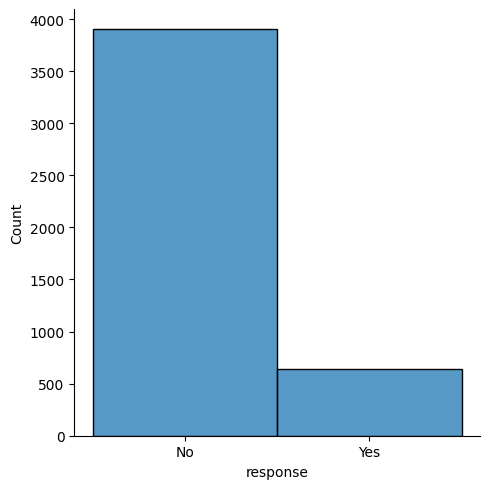

In [32]:
sns.displot(df.response, bins=100)
plt.show()

<Axes: xlabel='sales channel', ylabel='count'>

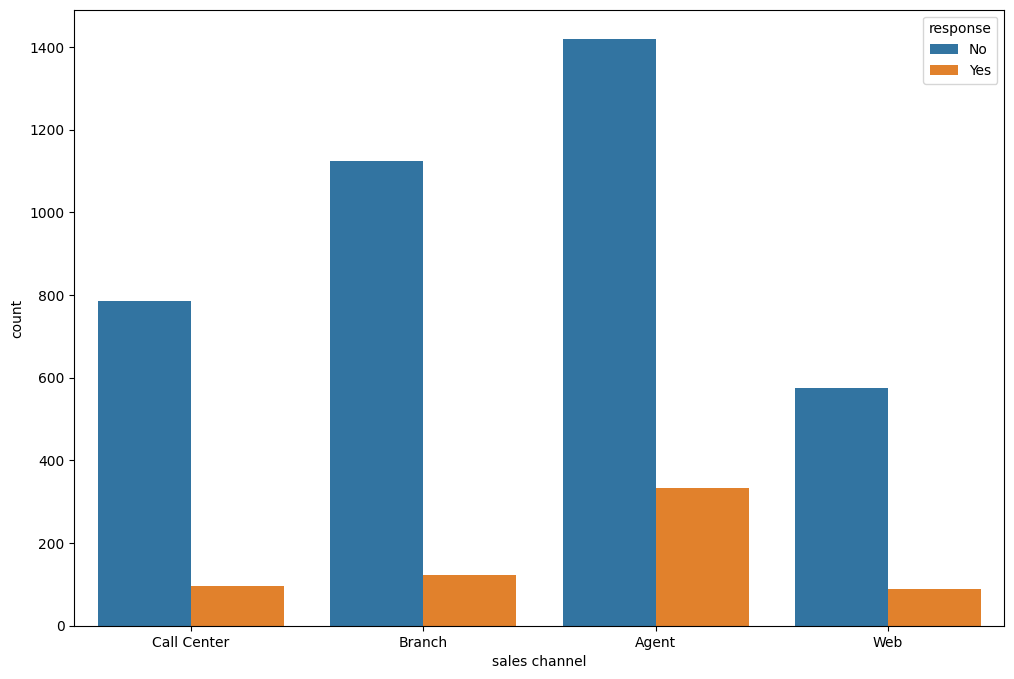

In [33]:
plt.figure(figsize=(12,8))
sns.countplot(x="sales channel", hue="response", data = df)

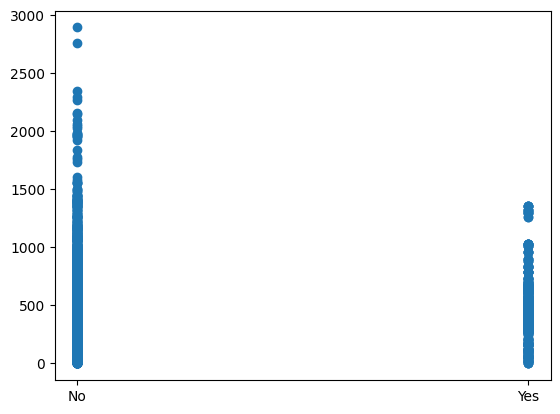

In [34]:
plt.scatter(df["response"], df["total claim amount"])
plt.show()

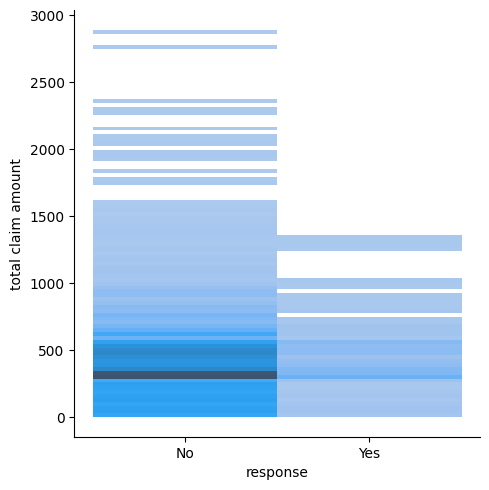

In [35]:
sns.displot(x="response", y="total claim amount", bins=100, data=df)
plt.show()

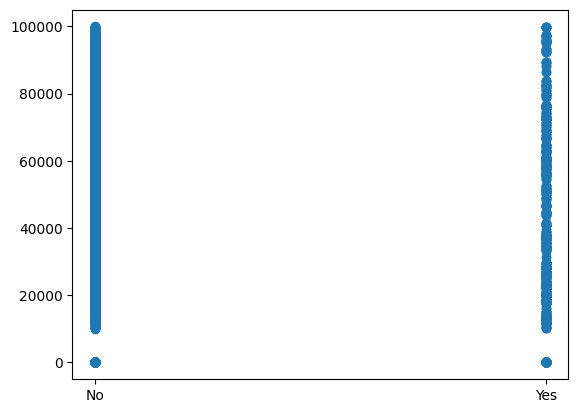

In [36]:
plt.scatter(df["response"], df["income"])
plt.show()

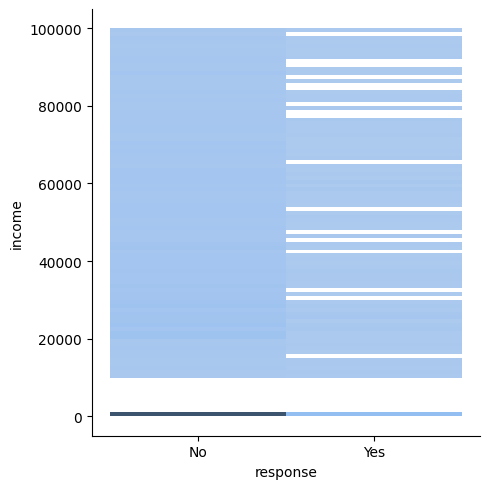

In [37]:
sns.displot(x="response", y="income", bins=100, data=df)
plt.show()

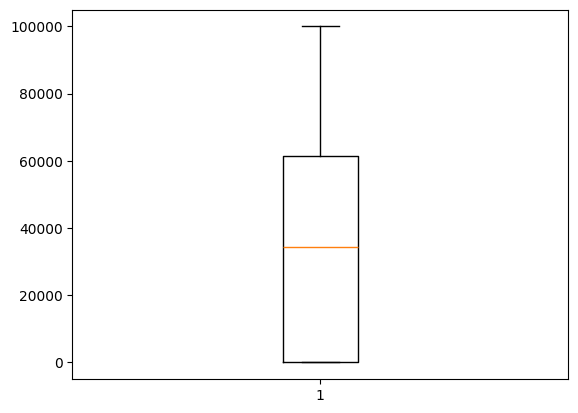

In [38]:
plt.boxplot(df.income)
plt.show() 

In [39]:
## Lab | Customer Analysis Round 4

    # Continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. Complete the following tasks to explore the data:
        # Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. (You can use np.number and np.object to select the numerical data types and categorical data types respectively)
        # Now we will try to check the normality of the numerical variables visually
        # Use seaborn library to construct distribution plots for the numerical variables
        # Use Matplotlib to construct histograms
        # Do the distributions for different numerical variables look like a normal distribution
        # For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.
        # Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

In [40]:
df.head(5)


customer       state  customer lifetime value response  coverage  \
2   LZ68649  Washington             14947.917300       No     Basic   
3   XL78013      Oregon             22332.439460      Yes  Extended   
10  HG93801     Arizona              5154.764074       No  Extended   
13  KR82385  California              5454.587929       No     Basic   
16  FH51383  California              5326.677654       No     Basic   

               education effective to date employmentstatus gender  income  \
2               Bachelor        2011-02-10         Employed      M   22139   
3                College        2011-02-10         Employed      M   49078   
10  High School or Below        2011-02-10         Employed      M   82730   
13                Master        2011-02-10         Employed      M   66334   
16  High School or Below        2011-02-10         Employed      F   76717   

    ... number of policies     policy type        policy  renew offer type  \
2   ...                  2   Personal Auto   Personal L3            Offer3   
3   ...                  2  Corporate Auto  Corporate L3            Offer2   
10  ...                  1  Corporate Auto  Corporate L3            Offer2   
13  ...                  4   Personal Auto   Personal L3            Offer4   
16  ...                  6   Personal Auto   Personal L3            Offer4   

    sales channel  total claim amount  vehicle class vehicle size  \
2     Call Center          480.000000            SUV      Medsize   
3          Branch          484.013411  Four-Door Car      Medsize   
10         Branch          442.521087            SUV        Large   
13    Call Center          331.200000   Two-Door Car      Medsize   
16    Call Center          300.528579   Two-Door Car        Large   

   vehicle type effective to date: month  
2             A                        2  
3             A                        1  
10            A                        1  
13            A                        1  
16            A                        2  

[5 rows x 26 columns]

In [41]:
df.dtypes

customer                                 object
state                                    object
customer lifetime value                 float64
response                                 object
coverage                                 object
education                                object
effective to date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location code                            object
marital status                           object
monthly premium auto                      int64
months since last claim                 float64
months since policy inception             int64
number of open complaints               float64
number of policies                        int64
policy type                              object
policy                                   object
renew offer type                         object
sales channel                           

In [42]:
df.shape

(4543, 26)

In [43]:
numerical = df.select_dtypes(include=np.number)  # np.number to select the numerical data types 
numerical.head()

customer lifetime value  income  monthly premium auto  \
2              14947.917300   22139                   100   
3              22332.439460   49078                    97   
10              5154.764074   82730                   127   
13              5454.587929   66334                    69   
16              5326.677654   76717                    66   

    months since last claim  months since policy inception  \
2                      34.0                             31   
3                      10.0                              3   
10                     13.0                             31   
13                     25.0                             25   
16                     26.0                             10   

    number of open complaints  number of policies  total claim amount  \
2                         0.0                   2          480.000000   
3                         0.0                   2          484.013411   
10                        0.0                   1          442.521087   
13                        0.0                   4          331.200000   
16                        0.0                   6          300.528579   

    effective to date: month  
2                          2  
3                          1  
10                         1  
13                         1  
16                         2

In [44]:
categorical = df.select_dtypes([np.object_])  # np.object to select the categorical data types
categorical.head()

customer       state response  coverage             education  \
2   LZ68649  Washington       No     Basic              Bachelor   
3   XL78013      Oregon      Yes  Extended               College   
10  HG93801     Arizona       No  Extended  High School or Below   
13  KR82385  California       No     Basic                Master   
16  FH51383  California       No     Basic  High School or Below   

   employmentstatus gender location code marital status     policy type  \
2          Employed      M      Suburban         Single   Personal Auto   
3          Employed      M      Suburban         Single  Corporate Auto   
10         Employed      M         Urban        Married  Corporate Auto   
13         Employed      M      Suburban         Single   Personal Auto   
16         Employed      F         Urban        Married   Personal Auto   

          policy renew offer type sales channel  vehicle class vehicle size  \
2    Personal L3           Offer3   Call Center            SUV      Medsize   
3   Corporate L3           Offer2        Branch  Four-Door Car      Medsize   
10  Corporate L3           Offer2        Branch            SUV        Large   
13   Personal L3           Offer4   Call Center   Two-Door Car      Medsize   
16   Personal L3           Offer4   Call Center   Two-Door Car        Large   

   vehicle type  
2             A  
3             A  
10            A  
13            A  
16            A

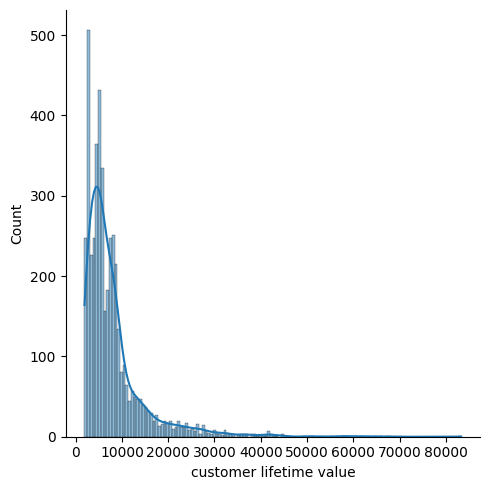

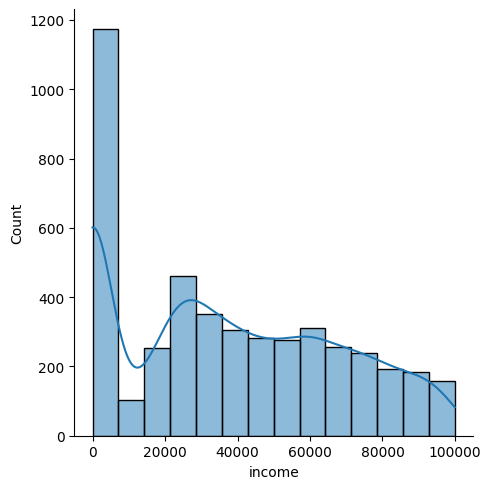

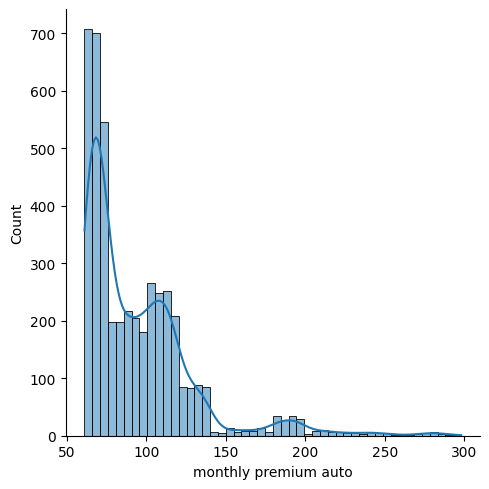

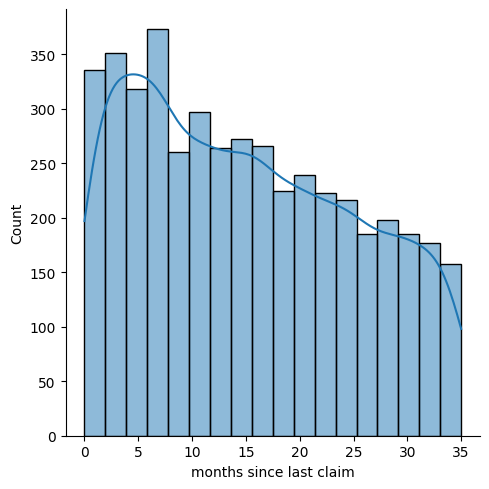

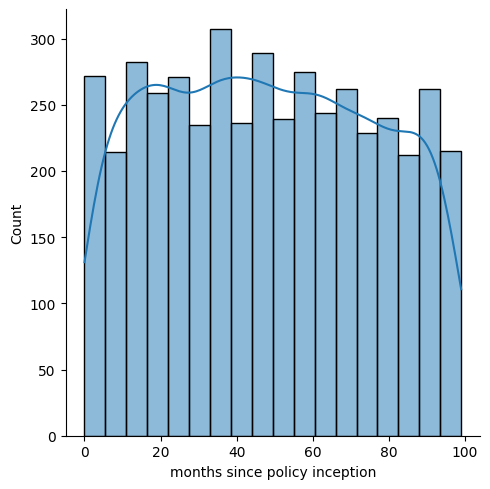

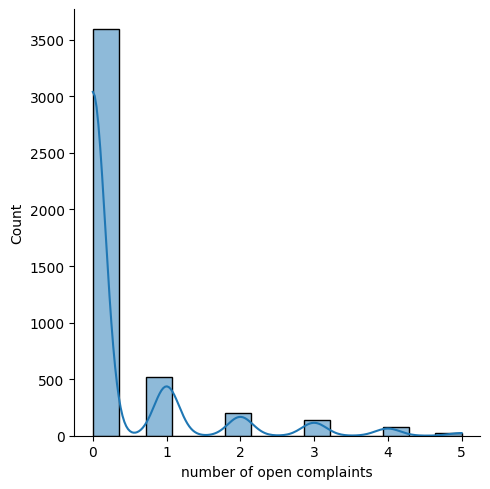

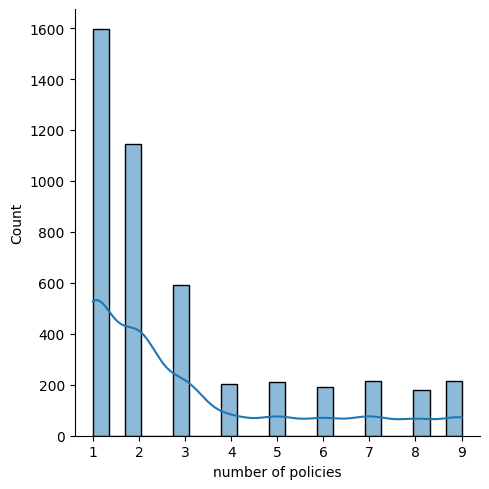

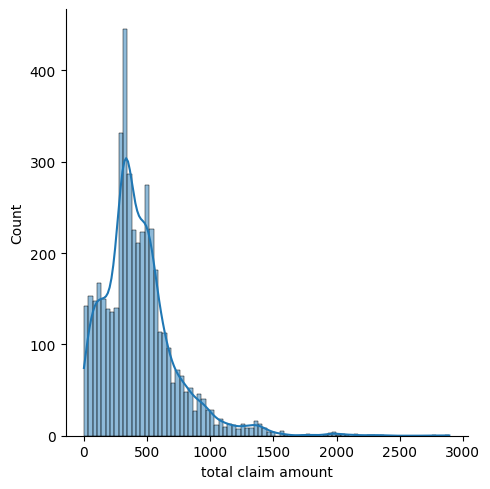

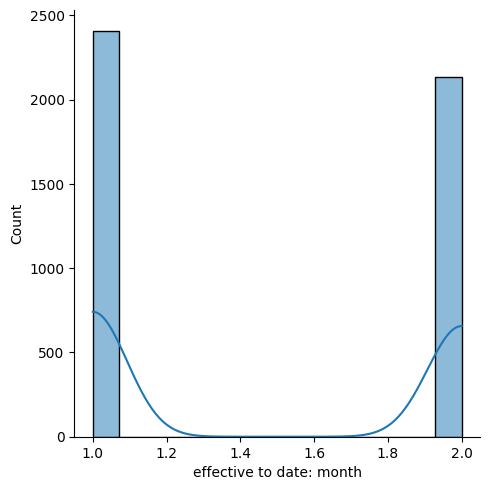

In [45]:
# Use seaborn library to construct distribution plots for the numerical variables
for column in numerical.columns:
    sns.displot(numerical[column],  kde=True)

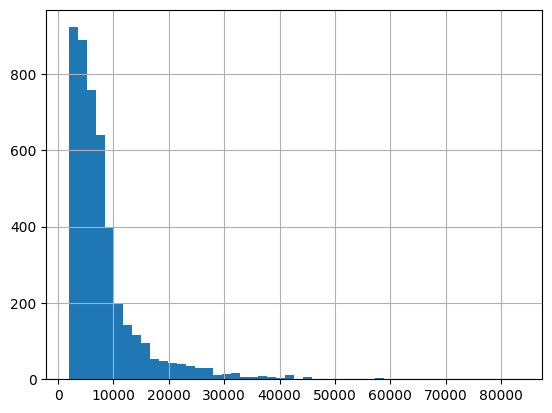

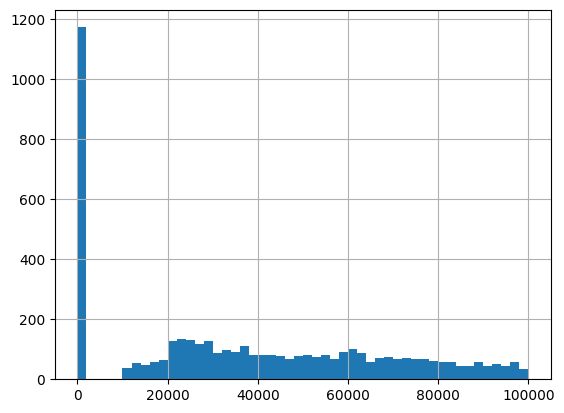

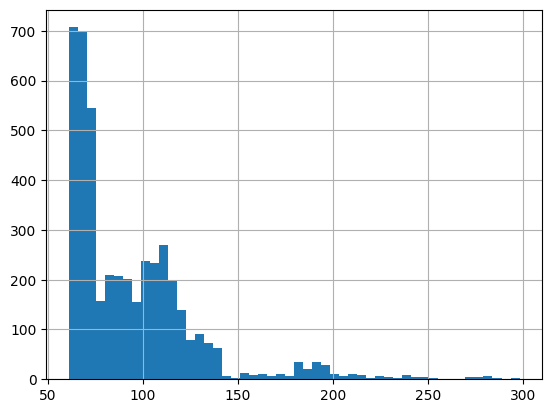

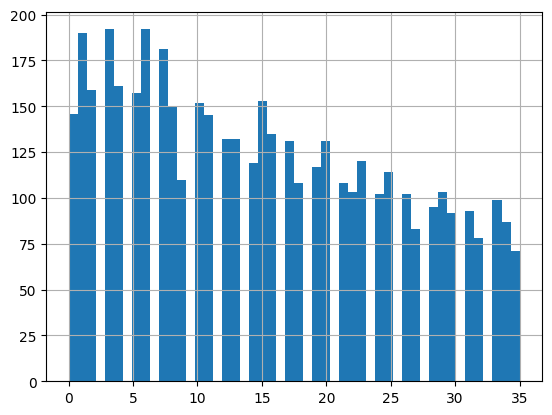

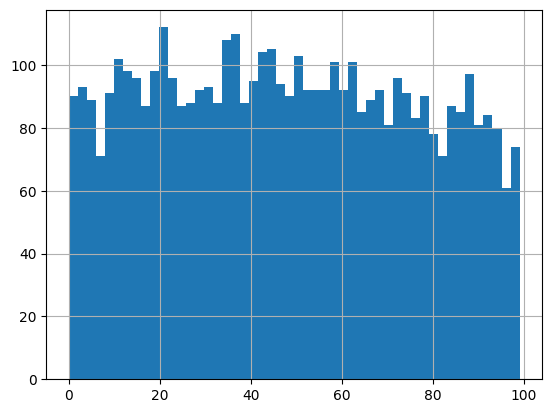

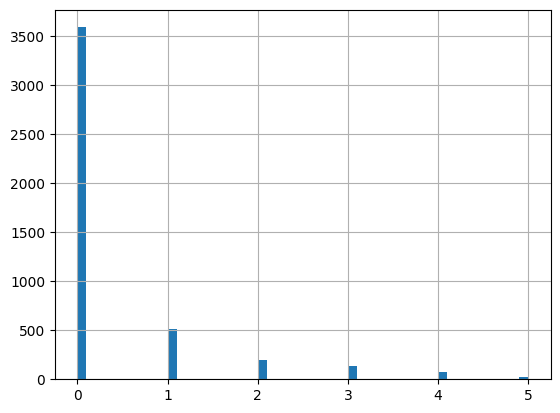

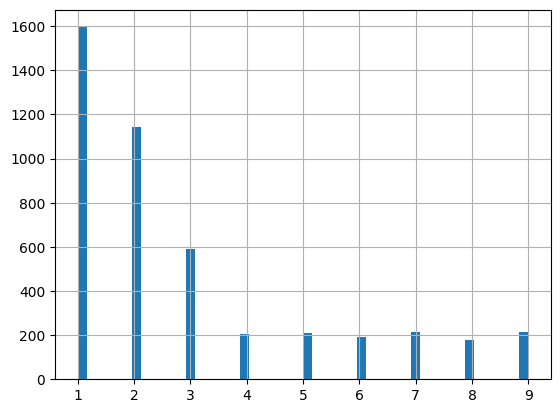

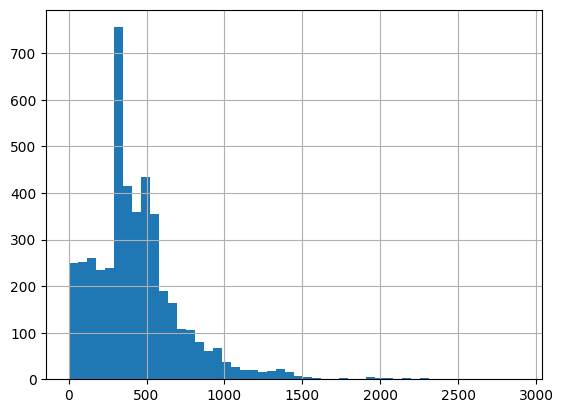

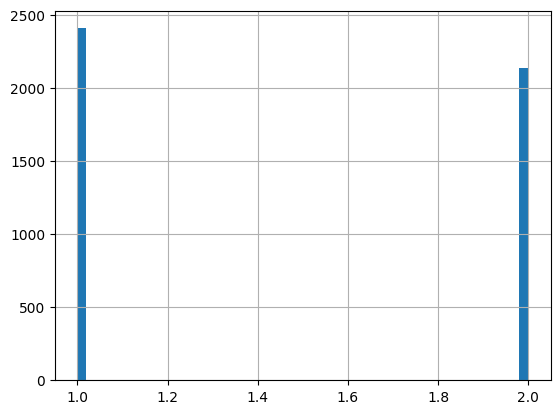

In [46]:
# Use Matplotlib to construct histograms:
for column in numerical.columns:
    numerical[column].hist(bins=50)
    plt.show()

In [47]:
# Do the distributions for different numerical variables look like a normal distribution

In [48]:
numerical.head()


customer lifetime value  income  monthly premium auto  \
2              14947.917300   22139                   100   
3              22332.439460   49078                    97   
10              5154.764074   82730                   127   
13              5454.587929   66334                    69   
16              5326.677654   76717                    66   

    months since last claim  months since policy inception  \
2                      34.0                             31   
3                      10.0                              3   
10                     13.0                             31   
13                     25.0                             25   
16                     26.0                             10   

    number of open complaints  number of policies  total claim amount  \
2                         0.0                   2          480.000000   
3                         0.0                   2          484.013411   
10                        0.0                   1          442.521087   
13                        0.0                   4          331.200000   
16                        0.0                   6          300.528579   

    effective to date: month  
2                          2  
3                          1  
10                         1  
13                         1  
16                         2

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\1977923788.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

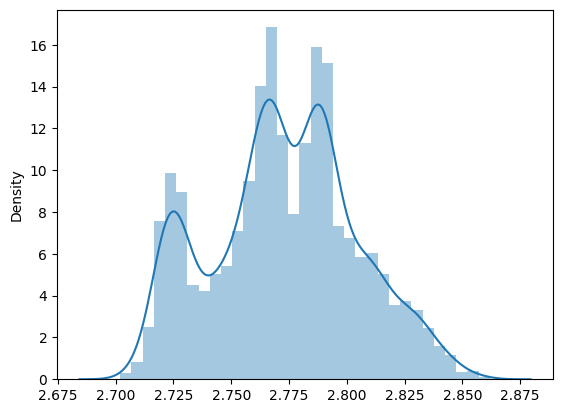

In [49]:
numerical["customer lifetime value"] = np.where(numerical["customer lifetime value"] >0, numerical["customer lifetime value"], numerical["customer lifetime value"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["customer lifetime value"])
sns.distplot(xt)


C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\309850968.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

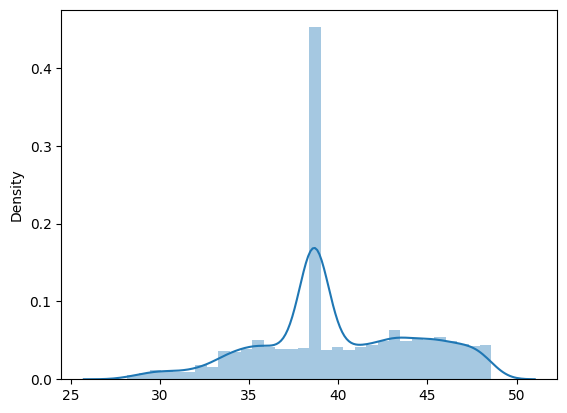

In [50]:
numerical["income"] = np.where(numerical["income"] >0, numerical["income"], numerical["income"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["income"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\1138992570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

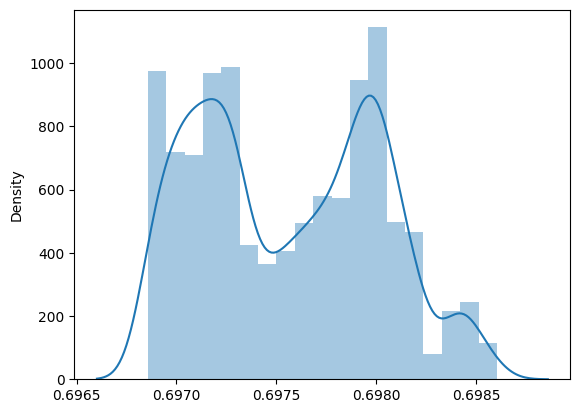

In [51]:
numerical["monthly premium auto"] = np.where(numerical["monthly premium auto"] >0, numerical["monthly premium auto"], numerical["monthly premium auto"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["monthly premium auto"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\4190057936.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

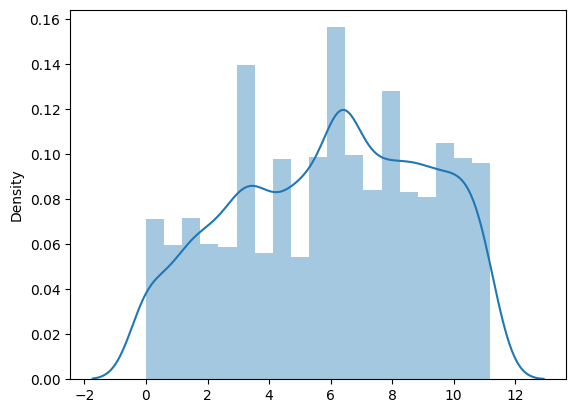

In [52]:
numerical["months since last claim"] = np.where(numerical["months since last claim"] >0, numerical["months since last claim"], numerical["months since last claim"].mean())
from scipy import stats
xt, lmbda = stats.boxcox(numerical["months since last claim"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\2327261120.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

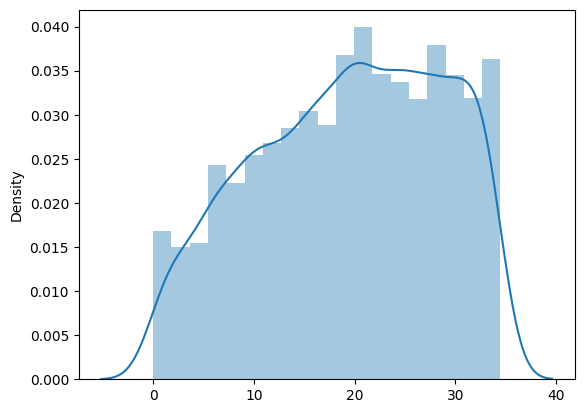

In [53]:
numerical["months since policy inception"] = np.where(numerical["months since policy inception"] >0, numerical["months since policy inception"], numerical["months since policy inception"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["months since policy inception"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\3279207322.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

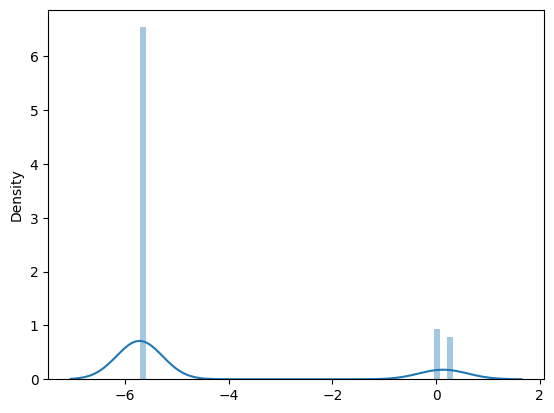

In [54]:
numerical["number of open complaints"] = np.where(numerical["number of open complaints"] >0, numerical["number of open complaints"], numerical["number of open complaints"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["number of open complaints"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\3428925087.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

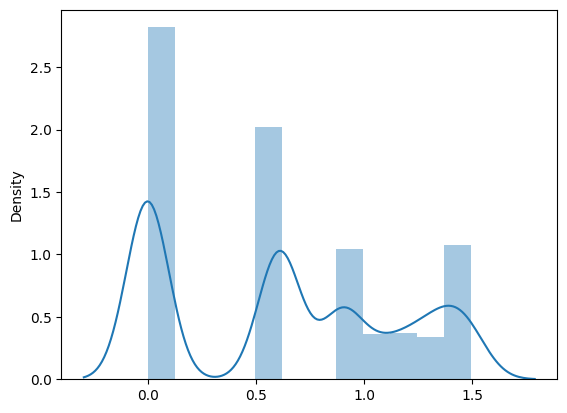

In [55]:
numerical["number of policies"] = np.where(numerical["number of policies"] >0, numerical["number of policies"], numerical["number of policies"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["number of policies"])
sns.distplot(xt)

C:\Users\rainm\AppData\Local\Temp\ipykernel_2344\3636753599.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xt)


<Axes: ylabel='Density'>

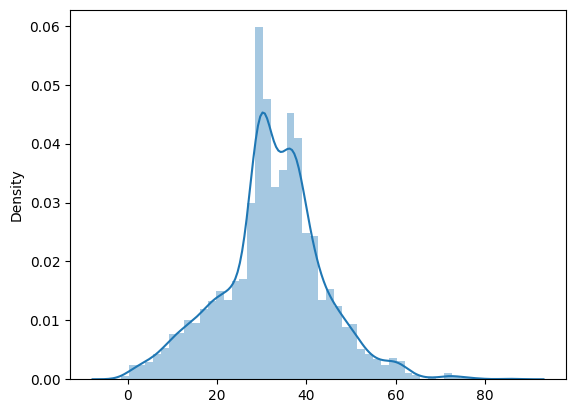

In [56]:
numerical["total claim amount"] = np.where(numerical["total claim amount"] >0, numerical["total claim amount"], numerical["total claim amount"].mean())

from scipy import stats
xt, lmbda = stats.boxcox(numerical["total claim amount"])
sns.distplot(xt)

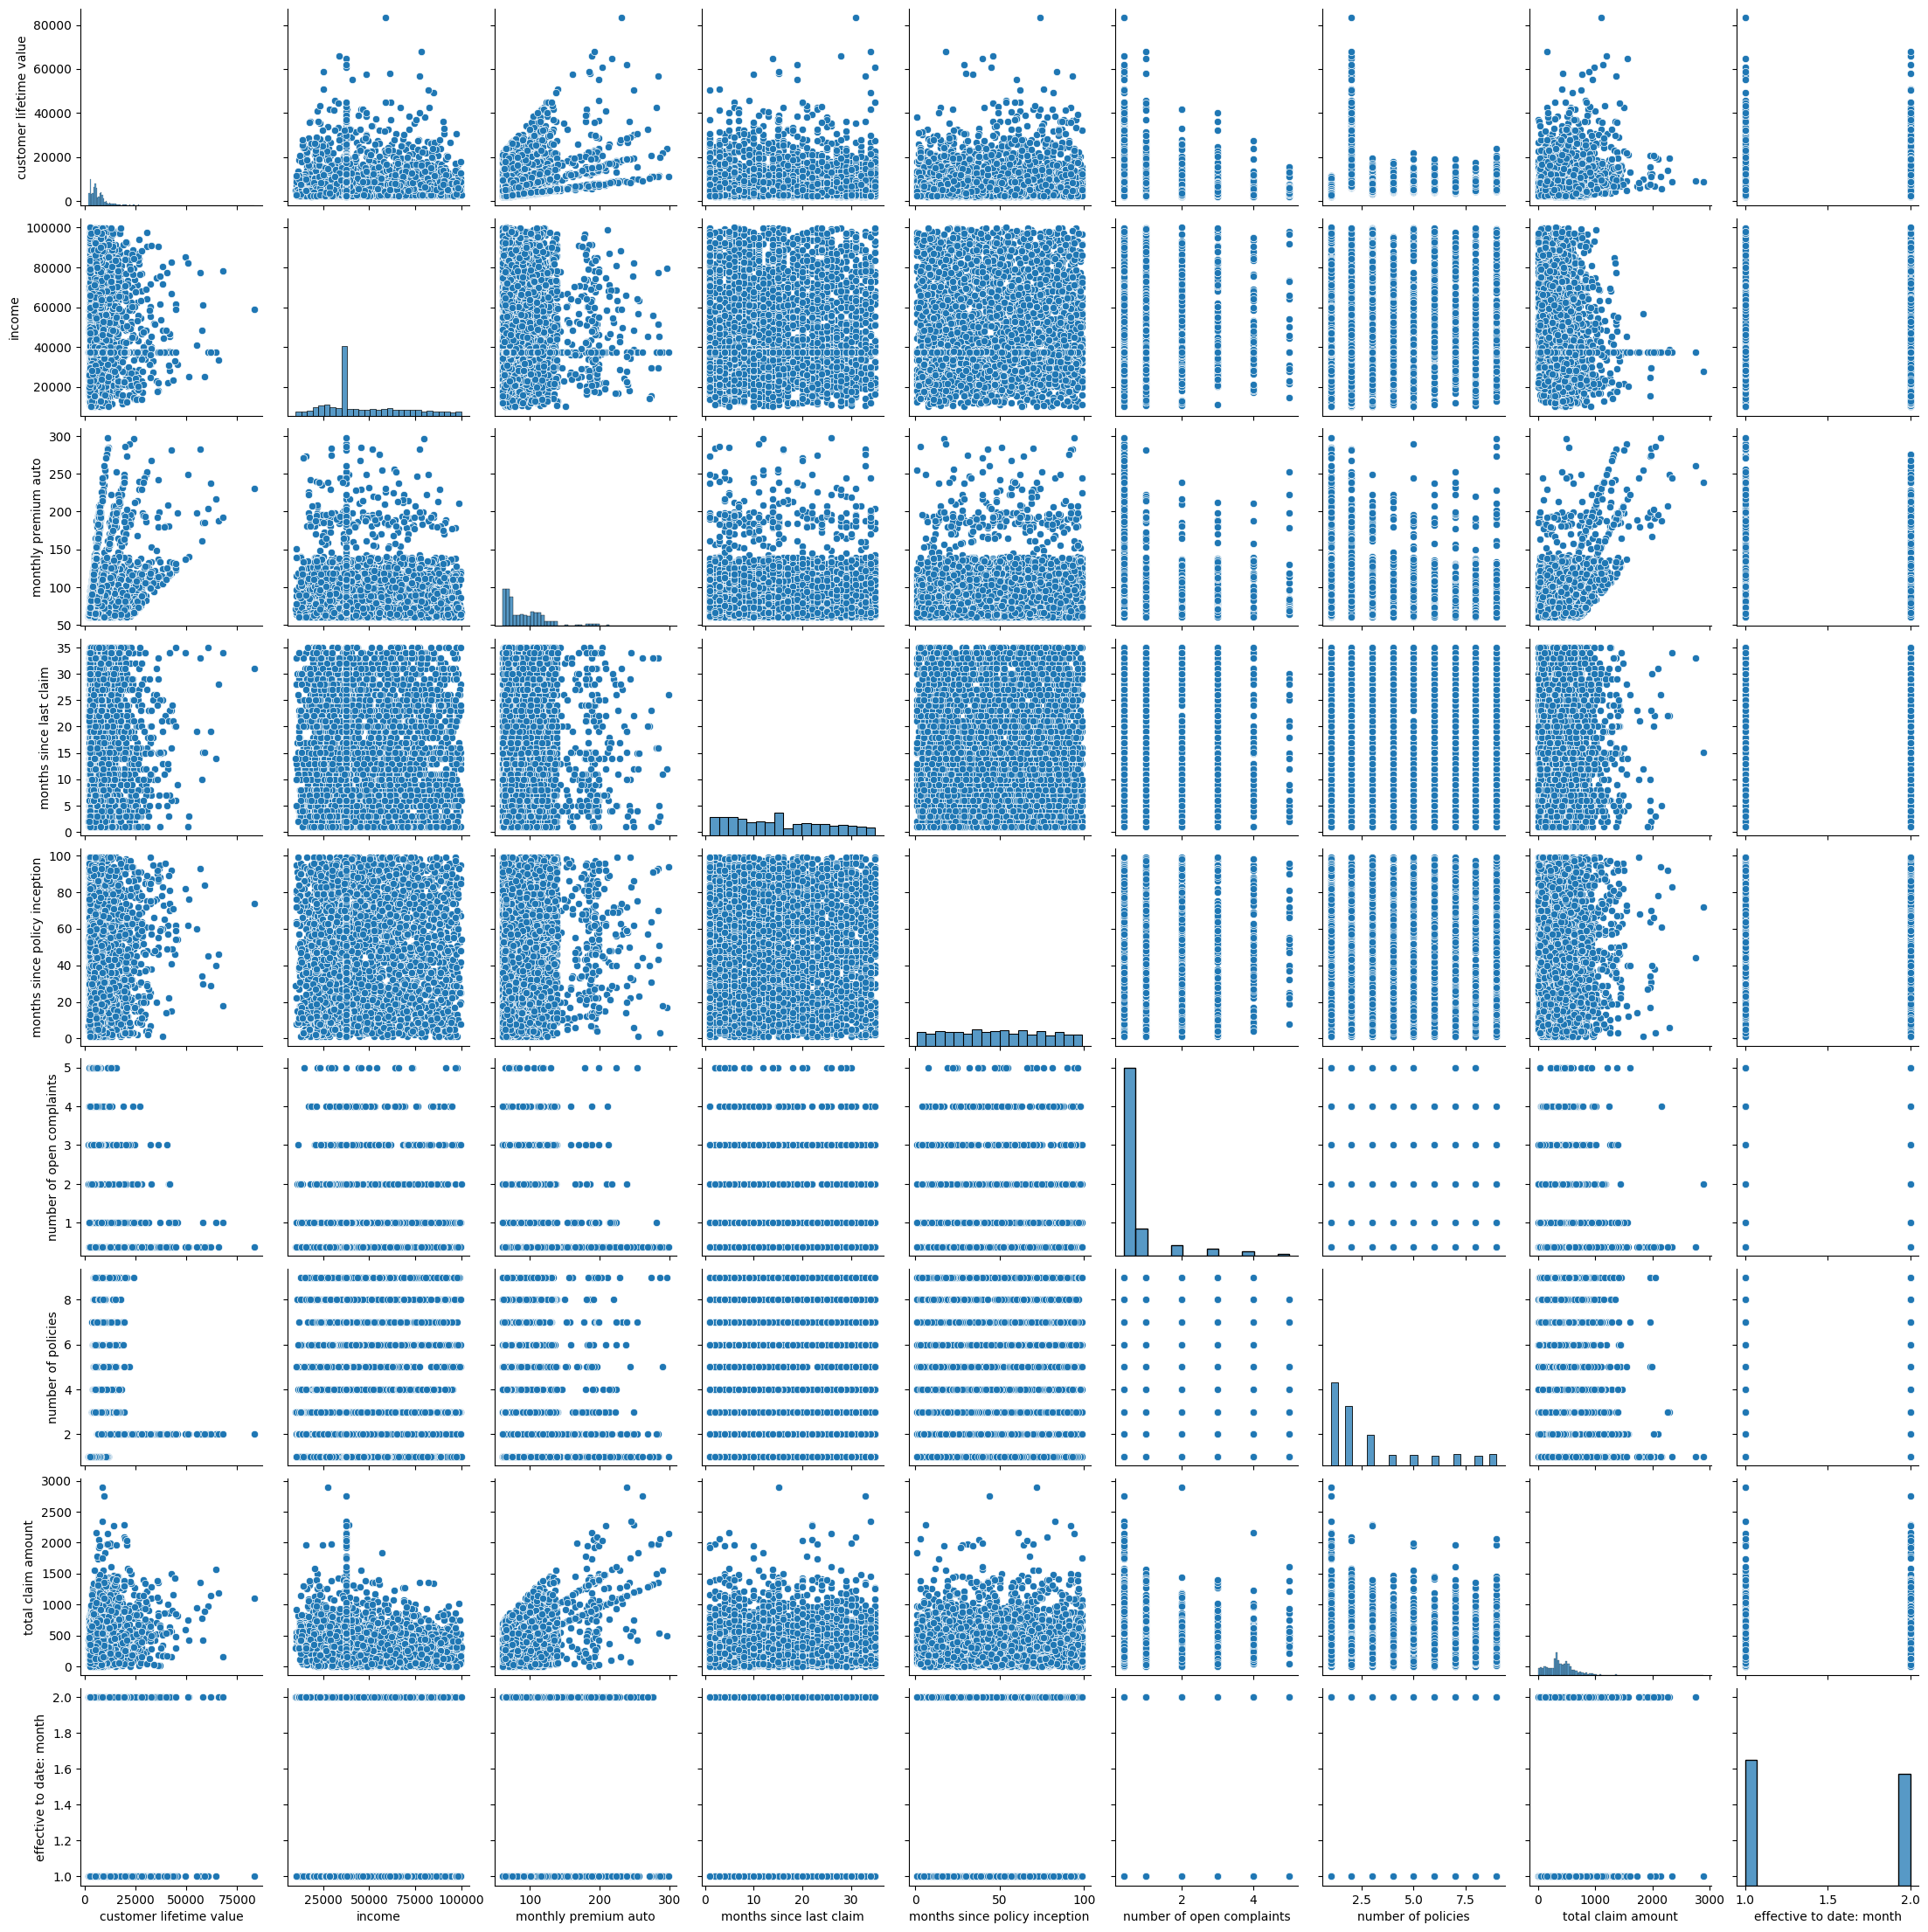

In [57]:
sns.pairplot(numerical)
plt.show()

In [58]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        4543 non-null   float64
 1   income                         4543 non-null   float64
 2   monthly premium auto           4543 non-null   float64
 3   months since last claim        4543 non-null   float64
 4   months since policy inception  4543 non-null   float64
 5   number of open complaints      4543 non-null   float64
 6   number of policies             4543 non-null   float64
 7   total claim amount             4543 non-null   float64
 8   effective to date: month       4543 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 337.2 KB


In [59]:
## For the numerical variables, check the multicollinearity between the features.
numerical.corr()

customer lifetime value    income  \
customer lifetime value                       1.000000 -0.001063   
income                                       -0.001063  1.000000   
monthly premium auto                          0.413739 -0.010334   
months since last claim                       0.035530 -0.005672   
months since policy inception                 0.019926  0.011914   
number of open complaints                    -0.037085  0.009225   
number of policies                            0.015397 -0.004590   
total claim amount                            0.228579 -0.252032   
effective to date: month                     -0.020217 -0.002762   

                               monthly premium auto  months since last claim  \
customer lifetime value                    0.413739                 0.035530   
income                                    -0.010334                -0.005672   
monthly premium auto                       1.000000                 0.005017   
months since last claim                    0.005017                 1.000000   
months since policy inception              0.033846                -0.031038   
number of open complaints                 -0.001502                -0.000404   
number of policies                        -0.025578                 0.000119   
total claim amount                         0.630894                -0.009584   
effective to date: month                  -0.002390                -0.004980   

                               months since policy inception  \
customer lifetime value                             0.019926   
income                                              0.011914   
monthly premium auto                                0.033846   
months since last claim                            -0.031038   
months since policy inception                       1.000000   
number of open complaints                          -0.000489   
number of policies                                 -0.004545   
total claim amount                                  0.014020   
effective to date: month                            0.007302   

                               number of open complaints  number of policies  \
customer lifetime value                        -0.037085            0.015397   
income                                          0.009225           -0.004590   
monthly premium auto                           -0.001502           -0.025578   
months since last claim                        -0.000404            0.000119   
months since policy inception                  -0.000489           -0.004545   
number of open complaints                       1.000000            0.012829   
number of policies                              0.012829            1.000000   
total claim amount                              0.001171            0.002864   
effective to date: month                        0.005180            0.025147   

                               total claim amount  effective to date: month  
customer lifetime value                  0.228579                 -0.020217  
income                                  -0.252032                 -0.002762  
monthly premium auto                     0.630894                 -0.002390  
months since last claim                 -0.009584                 -0.004980  
months since policy inception            0.014020                  0.007302  
number of open complaints                0.001171                  0.005180  
number of policies                       0.002864                  0.025147  
total claim amount                       1.000000                 -0.004340  
effective to date: month                -0.004340                  1.000000

In [60]:
## Multicollinearity can exist when two independent variables are highly correlated. It can also happen if an independent variable is computed from other variables in the data set or if two independent variables provide similar and repetitive results.
## We usually drop one of the two features that show a high correlation between them (e.g. greater than 0.9 or 0.95).

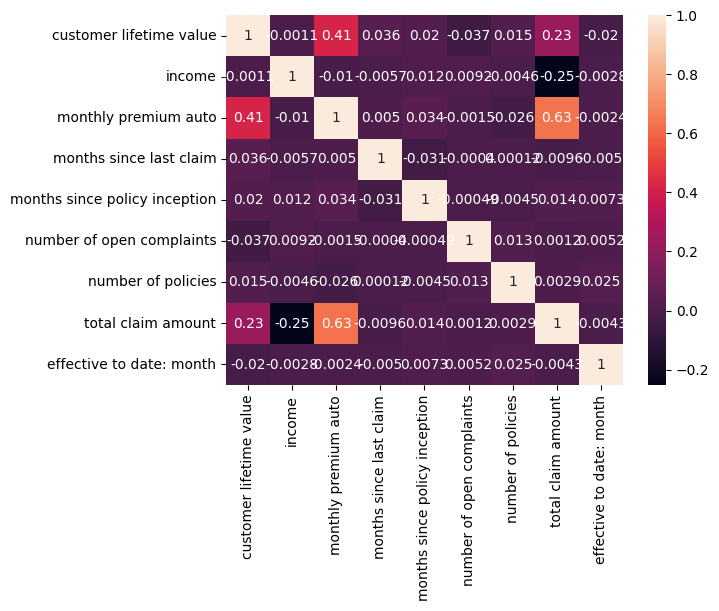

<Figure size 640x480 with 0 Axes>

In [61]:
## Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

correlation_matrix = numerical.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.show()
plt.savefig("seaborn_heatmap.png", format='svg')

In [62]:
## Lab | Customer Analysis Round 5
    ## Get the file: marketing_customer_analysis.csv
    ## Processing Data: X-y split; Normalize (numerical)

In [63]:
df.head(5)

customer       state  customer lifetime value response  coverage  \
2   LZ68649  Washington             14947.917300       No     Basic   
3   XL78013      Oregon             22332.439460      Yes  Extended   
10  HG93801     Arizona              5154.764074       No  Extended   
13  KR82385  California              5454.587929       No     Basic   
16  FH51383  California              5326.677654       No     Basic   

               education effective to date employmentstatus gender  income  \
2               Bachelor        2011-02-10         Employed      M   22139   
3                College        2011-02-10         Employed      M   49078   
10  High School or Below        2011-02-10         Employed      M   82730   
13                Master        2011-02-10         Employed      M   66334   
16  High School or Below        2011-02-10         Employed      F   76717   

    ... number of policies     policy type        policy  renew offer type  \
2   ...                  2   Personal Auto   Personal L3            Offer3   
3   ...                  2  Corporate Auto  Corporate L3            Offer2   
10  ...                  1  Corporate Auto  Corporate L3            Offer2   
13  ...                  4   Personal Auto   Personal L3            Offer4   
16  ...                  6   Personal Auto   Personal L3            Offer4   

    sales channel  total claim amount  vehicle class vehicle size  \
2     Call Center          480.000000            SUV      Medsize   
3          Branch          484.013411  Four-Door Car      Medsize   
10         Branch          442.521087            SUV        Large   
13    Call Center          331.200000   Two-Door Car      Medsize   
16    Call Center          300.528579   Two-Door Car        Large   

   vehicle type effective to date: month  
2             A                        2  
3             A                        1  
10            A                        1  
13            A                        1  
16            A                        2  

[5 rows x 26 columns]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       4543 non-null   object        
 1   state                          4543 non-null   object        
 2   customer lifetime value        4543 non-null   float64       
 3   response                       4543 non-null   object        
 4   coverage                       4543 non-null   object        
 5   education                      4543 non-null   object        
 6   effective to date              4543 non-null   datetime64[ns]
 7   employmentstatus               4543 non-null   object        
 8   gender                         4543 non-null   object        
 9   income                         4543 non-null   int64         
 10  location code                  4543 non-null   object        
 11  marital status       

In [65]:
numerical.head(5)

customer lifetime value   income  monthly premium auto  \
2              14947.917300  22139.0                 100.0   
3              22332.439460  49078.0                  97.0   
10              5154.764074  82730.0                 127.0   
13              5454.587929  66334.0                  69.0   
16              5326.677654  76717.0                  66.0   

    months since last claim  months since policy inception  \
2                      34.0                           31.0   
3                      10.0                            3.0   
10                     13.0                           31.0   
13                     25.0                           25.0   
16                     26.0                           10.0   

    number of open complaints  number of policies  total claim amount  \
2                    0.386309                 2.0          480.000000   
3                    0.386309                 2.0          484.013411   
10                   0.386309                 1.0          442.521087   
13                   0.386309                 4.0          331.200000   
16                   0.386309                 6.0          300.528579   

    effective to date: month  
2                          2  
3                          1  
10                         1  
13                         1  
16                         2

In [66]:
numerical.describe()

customer lifetime value        income  monthly premium auto  \
count              4543.000000   4543.000000           4543.000000   
mean               8033.714059  47123.384985             93.773278   
std                6959.529443  21440.853252             35.093661   
min                1904.000852  10037.000000             61.000000   
25%                4039.089902  35111.000000             69.000000   
50%                5846.520588  37453.033238             83.000000   
75%                8936.596938  61560.000000            110.000000   
max               83325.381190  99961.000000            298.000000   

       months since last claim  months since policy inception  \
count              4543.000000                    4543.000000   
mean                 15.597474                      48.620244   
std                   9.777873                      27.741083   
min                   1.000000                       1.000000   
25%                   7.000000                      25.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                      99.000000   

       number of open complaints  number of policies  total claim amount  \
count                4543.000000         4543.000000         4543.000000   
mean                    0.691750            2.980189          436.477525   
std                     0.782507            2.390362          295.026990   
min                     0.386309            1.000000            0.099007   
25%                     0.386309            1.000000          265.686145   
50%                     0.386309            2.000000          384.000000   
75%                     0.386309            4.000000          552.000000   
max                     5.000000            9.000000         2893.239678   

       effective to date: month  
count               4543.000000  
mean                   1.469734  
std                    0.499138  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    2.000000  
max                    2.000000

In [67]:
categorical.head(5)

customer       state response  coverage             education  \
2   LZ68649  Washington       No     Basic              Bachelor   
3   XL78013      Oregon      Yes  Extended               College   
10  HG93801     Arizona       No  Extended  High School or Below   
13  KR82385  California       No     Basic                Master   
16  FH51383  California       No     Basic  High School or Below   

   employmentstatus gender location code marital status     policy type  \
2          Employed      M      Suburban         Single   Personal Auto   
3          Employed      M      Suburban         Single  Corporate Auto   
10         Employed      M         Urban        Married  Corporate Auto   
13         Employed      M      Suburban         Single   Personal Auto   
16         Employed      F         Urban        Married   Personal Auto   

          policy renew offer type sales channel  vehicle class vehicle size  \
2    Personal L3           Offer3   Call Center            SUV      Medsize   
3   Corporate L3           Offer2        Branch  Four-Door Car      Medsize   
10  Corporate L3           Offer2        Branch            SUV        Large   
13   Personal L3           Offer4   Call Center   Two-Door Car      Medsize   
16   Personal L3           Offer4   Call Center   Two-Door Car        Large   

   vehicle type  
2             A  
3             A  
10            A  
13            A  
16            A

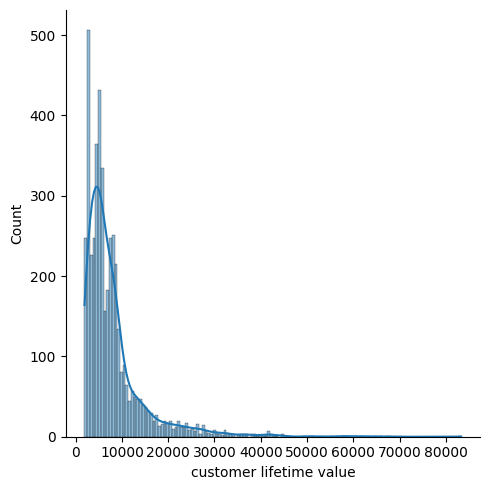

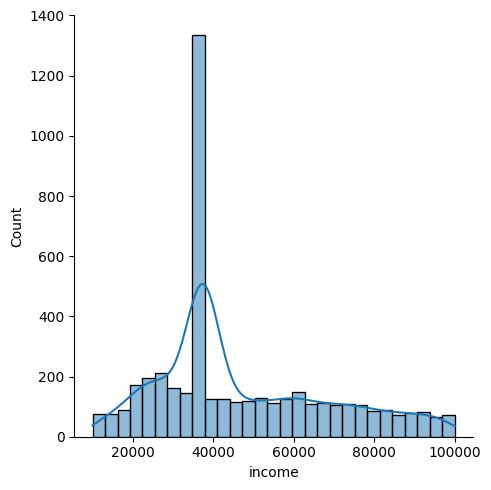

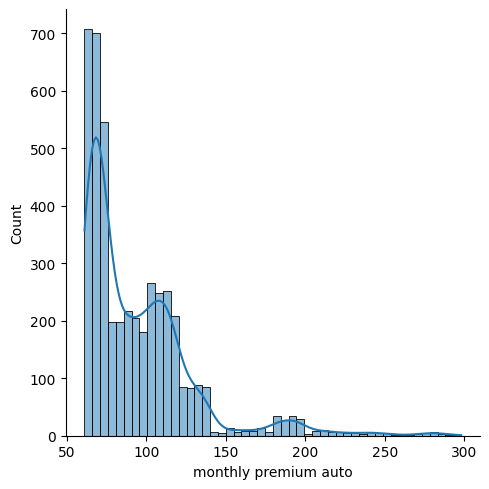

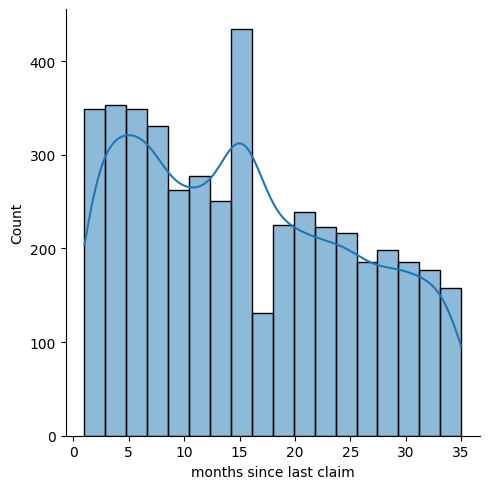

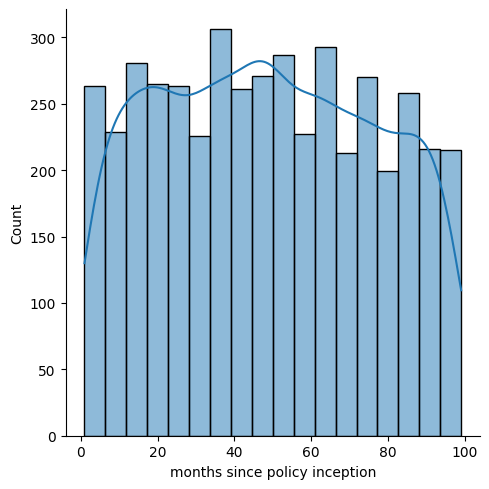

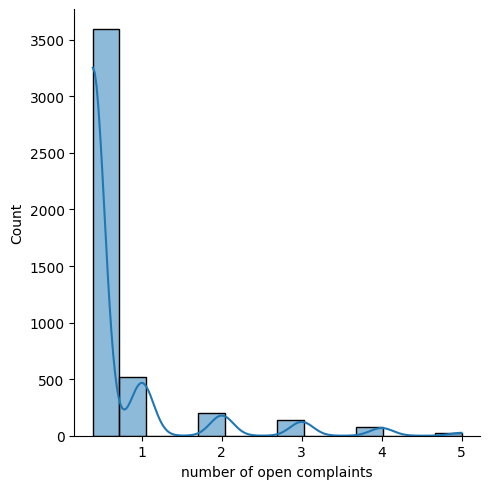

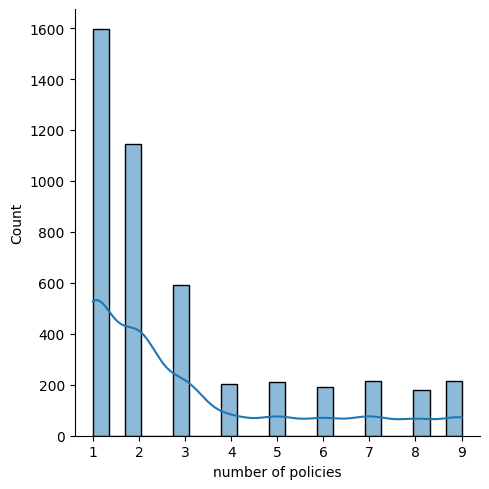

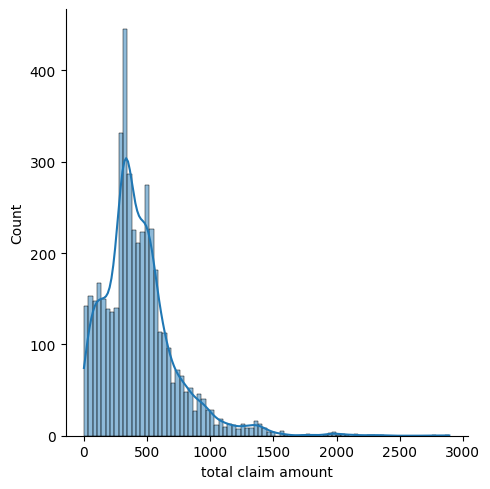

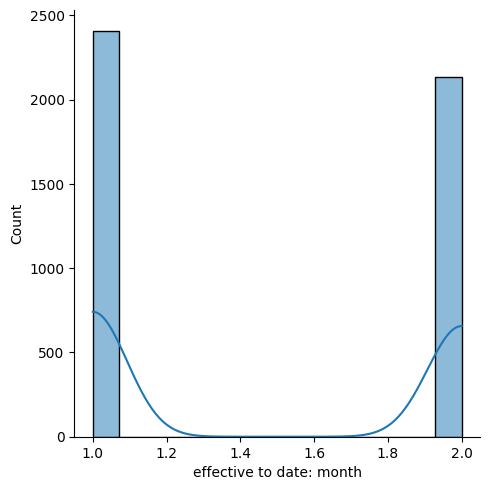

In [68]:
for column in numerical.columns:
    sns.displot(numerical[column],  kde=True)

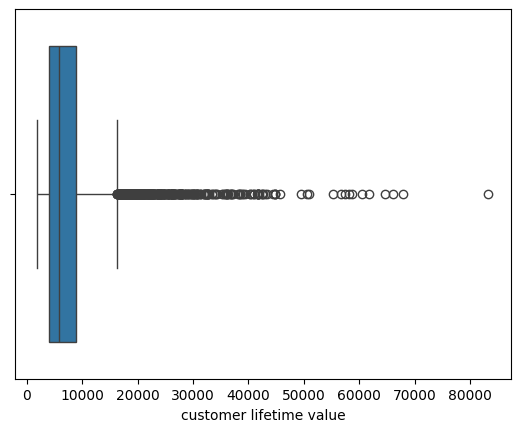

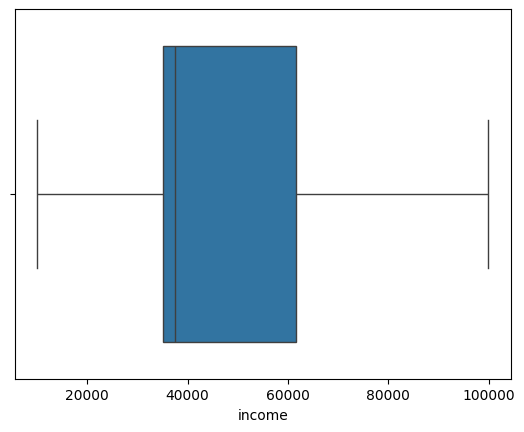

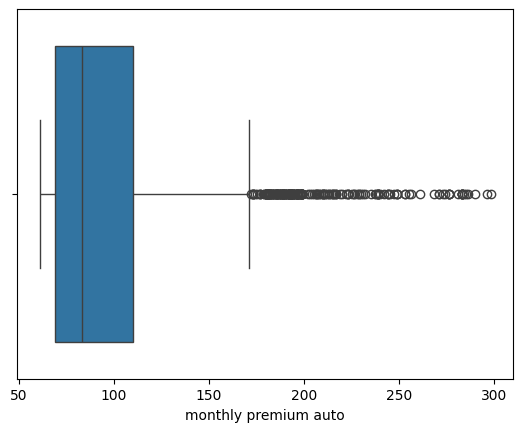

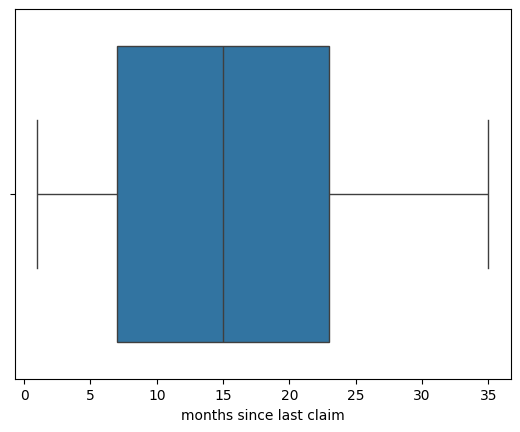

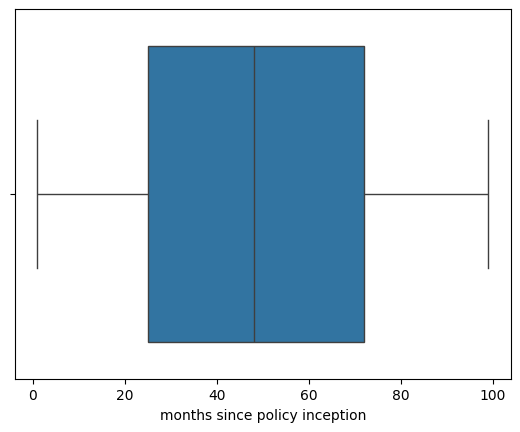

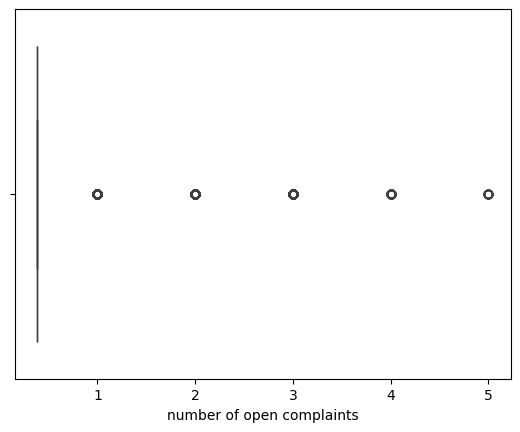

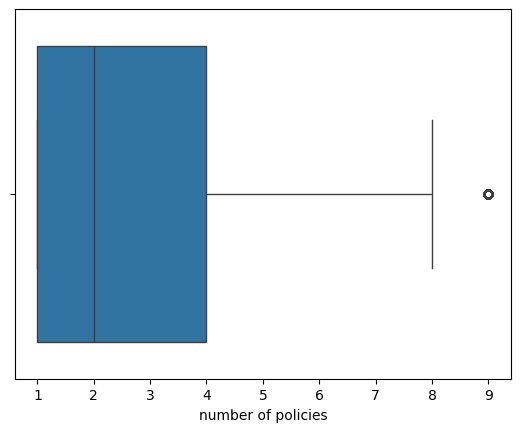

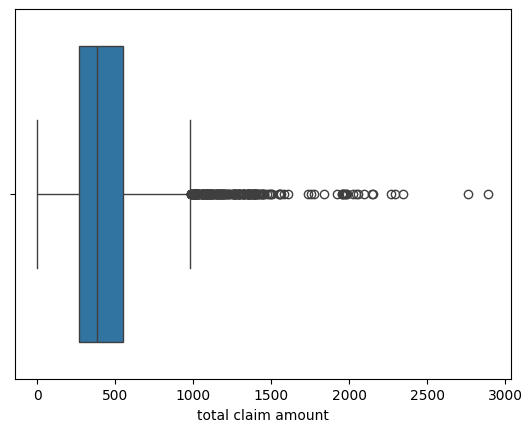

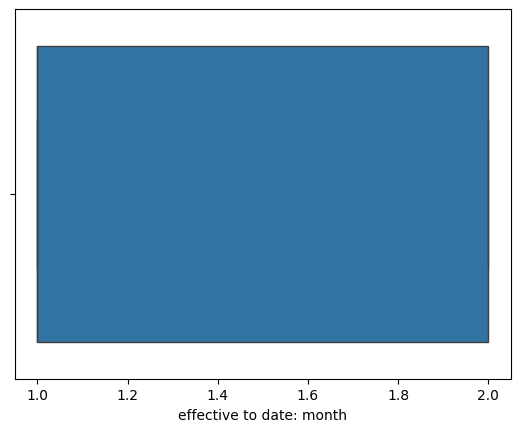

In [69]:
for column in numerical.columns:
    sns.boxplot(x=column, data = numerical)
    plt.show()

In [70]:
##  Please note that we will use the column "total_claim_amount" later as the target variable.

## Analyzing the boxplots, it seems that "customer lifetime value", "monthly premium auto", and "total_claim_amount" have many outliers

In [71]:
## Cleaning outliers of "customer lifetime value"

IQR = np.percentile(numerical["customer lifetime value"], 75) - np.percentile(numerical["customer lifetime value"], 25)
upper_limit = np.percentile(numerical["customer lifetime value"], 75) + 1.5 *IQR
lower_limit = np.percentile(numerical["customer lifetime value"], 25) - 1.5 * IQR

mask_cleaned = (numerical["customer lifetime value"] < upper_limit) & (numerical["customer lifetime value"] > lower_limit) 

removed_outliers_customer_lifetime_value = numerical[mask_cleaned]
removed_outliers_customer_lifetime_value.describe()

customer lifetime value        income  monthly premium auto  \
count              4140.000000   4140.000000           4140.000000   
mean               6303.422309  47209.536408             91.353623   
std                3219.143058  21488.021880             31.817090   
min                1904.000852  10037.000000             61.000000   
25%                3803.169464  35193.250000             68.000000   
50%                5510.333204  37453.033238             81.000000   
75%                8186.960925  61659.250000            108.000000   
max               16272.743220  99961.000000            298.000000   

       months since last claim  months since policy inception  \
count              4140.000000                    4140.000000   
mean                 15.504450                      48.592103   
std                   9.748741                      27.765841   
min                   1.000000                       1.000000   
25%                   7.000000                      25.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                      99.000000   

       number of open complaints  number of policies  total claim amount  \
count                4140.000000         4140.000000         4140.000000   
mean                    0.699589            3.054348          426.091052   
std                     0.798348            2.470056          282.377548   
min                     0.386309            1.000000            0.099007   
25%                     0.386309            1.000000          263.296725   
50%                     0.386309            2.000000          374.400000   
75%                     0.386309            4.000000          542.400000   
max                     5.000000            9.000000         2893.239678   

       effective to date: month  
count               4140.000000  
mean                   1.472705  
std                    0.499315  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    2.000000  
max                    2.000000

In [72]:
## Cleaning outliers of "monthly premium auto"

IQR = np.percentile(removed_outliers_customer_lifetime_value["monthly premium auto"], 75) - np.percentile(removed_outliers_customer_lifetime_value["monthly premium auto"], 25)
upper_limit = np.percentile(removed_outliers_customer_lifetime_value["monthly premium auto"], 75) + 1.5 *IQR
lower_limit = np.percentile(removed_outliers_customer_lifetime_value["monthly premium auto"], 25) - 1.5 * IQR

mask_cleaned = (removed_outliers_customer_lifetime_value["monthly premium auto"] < upper_limit) & (removed_outliers_customer_lifetime_value["monthly premium auto"] > lower_limit) 

removed_outliers_monthly_premium_auto = removed_outliers_customer_lifetime_value[mask_cleaned]
removed_outliers_monthly_premium_auto.describe()

customer lifetime value        income  monthly premium auto  \
count              3983.000000   3983.000000           3983.000000   
mean               6134.400275  47188.755612             86.953302   
std                3093.194902  21570.985622             22.450858   
min                1904.000852  10037.000000             61.000000   
25%                3701.654667  35039.000000             68.000000   
50%                5394.913017  37453.033238             79.000000   
75%                8056.820874  61756.500000            105.000000   
max               16272.743220  99961.000000            167.000000   

       months since last claim  months since policy inception  \
count              3983.000000                    3983.000000   
mean                 15.472139                      48.467487   
std                   9.738528                      27.809391   
min                   1.000000                       1.000000   
25%                   7.000000                      25.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                      99.000000   

       number of open complaints  number of policies  total claim amount  \
count                3983.000000         3983.000000         3983.000000   
mean                    0.697215            3.069295          401.221852   
std                     0.790835            2.466393          235.706815   
min                     0.386309            1.000000            0.099007   
25%                     0.386309            1.000000          255.803256   
50%                     0.386309            2.000000          364.800000   
75%                     0.386309            4.000000          528.000000   
max                     5.000000            9.000000         1985.999807   

       effective to date: month  
count               3983.000000  
mean                   1.474266  
std                    0.499400  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    2.000000  
max                    2.000000

In [73]:
## Cleaning outliers of "total_claim_amount""
 
IQR = np.percentile(removed_outliers_monthly_premium_auto["total claim amount"], 75) - np.percentile(removed_outliers_monthly_premium_auto["total claim amount"], 25)
upper_limit = np.percentile(removed_outliers_monthly_premium_auto["total claim amount"], 75) + 1.5 *IQR
lower_limit = np.percentile(removed_outliers_monthly_premium_auto["total claim amount"], 25) - 1.5 * IQR

mask_cleaned = (removed_outliers_monthly_premium_auto["total claim amount"] < upper_limit) & (removed_outliers_monthly_premium_auto["total claim amount"] > lower_limit) 

removed_outliers_total_claim_amount = removed_outliers_monthly_premium_auto[mask_cleaned]
removed_outliers_total_claim_amount.describe()

customer lifetime value        income  monthly premium auto  \
count              3867.000000   3867.000000           3867.000000   
mean               6085.216910  47501.958497             85.963796   
std                3085.442828  21767.399961             21.803791   
min                1904.000852  10037.000000             61.000000   
25%                3659.976699  34762.000000             68.000000   
50%                5367.089817  37453.033238             78.000000   
75%                7997.927828  62467.000000            103.000000   
max               16272.743220  99961.000000            167.000000   

       months since last claim  months since policy inception  \
count              3867.000000                    3867.000000   
mean                 15.459034                      48.511727   
std                   9.727570                      27.731294   
min                   1.000000                       1.000000   
25%                   7.000000                      25.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                      99.000000   

       number of open complaints  number of policies  total claim amount  \
count                3867.000000         3867.000000         3867.000000   
mean                    0.694299            3.057409          380.256410   
std                     0.784604            2.464085          203.349748   
min                     0.386309            1.000000            0.099007   
25%                     0.386309            1.000000          246.636539   
50%                     0.386309            2.000000          355.200000   
75%                     0.386309            4.000000          513.600000   
max                     5.000000            9.000000          936.000000   

       effective to date: month  
count               3867.000000  
mean                   1.473752  
std                    0.499375  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    2.000000  
max                    2.000000

In [74]:
df_outliers_removed = removed_outliers_total_claim_amount

In [75]:
df_outliers_removed.info()

## Reconfirming that there are no nans

<class 'pandas.core.frame.DataFrame'>
Index: 3867 entries, 2 to 10908
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        3867 non-null   float64
 1   income                         3867 non-null   float64
 2   monthly premium auto           3867 non-null   float64
 3   months since last claim        3867 non-null   float64
 4   months since policy inception  3867 non-null   float64
 5   number of open complaints      3867 non-null   float64
 6   number of policies             3867 non-null   float64
 7   total claim amount             3867 non-null   float64
 8   effective to date: month       3867 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 287.0 KB


In [76]:
4543 - 3867 ## 676 rows (676 outliers) were removed


676

In [77]:
## checking the duplicates

df_outliers_removed[df_outliers_removed.duplicated()]   ## We see below that there are 379 rows (379 duplicates). In case of an empty dataframe as a result, we would assume no duplicates

customer lifetime value   income  monthly premium auto  \
171                2471.528431  95697.0                  61.0   
846                5096.673223  22886.0                  65.0   
941                4605.036646  22571.0                  63.0   
951                2491.257604  25965.0                  65.0   
1416               2471.528431  95697.0                  61.0   
...                        ...      ...                   ...   
10818              2300.691547  25905.0                  63.0   
10825              5470.060561  54507.0                 138.0   
10840              2453.570794  29735.0                  69.0   
10887              8879.790017  52583.0                 113.0   
10897              9075.768214  37722.0                 116.0   

       months since last claim  months since policy inception  \
171                       16.0                           55.0   
846                        9.0                           81.0   
941                       29.0                           51.0   
951                       23.0                           27.0   
1416                      16.0                           55.0   
...                        ...                            ...   
10818                     21.0                           12.0   
10825                     20.0                           11.0   
10840                      3.0                           92.0   
10887                     12.0                           59.0   
10897                      8.0                           23.0   

       number of open complaints  number of policies  total claim amount  \
171                     0.386309                 1.0          114.273025   
846                     0.386309                 3.0          312.000000   
941                     0.386309                 9.0          302.400000   
951                     0.386309                 1.0          329.206567   
1416                    0.386309                 1.0          114.273025   
...                          ...                 ...                 ...   
10818                   0.386309                 1.0          302.400000   
10825                   0.386309                 1.0          702.990032   
10840                   0.386309                 1.0          331.200000   
10887                   0.386309                 7.0          528.200860   
10897                   0.386309                 8.0          158.077504   

       effective to date: month  
171                           1  
846                           1  
941                           1  
951                           2  
1416                          1  
...                         ...  
10818                         1  
10825                         2  
10840                         2  
10887                         2  
10897                         1  

[379 rows x 9 columns]

In [78]:
df_final = df_outliers_removed.drop_duplicates()

df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3488 entries, 2 to 10908
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        3488 non-null   float64
 1   income                         3488 non-null   float64
 2   monthly premium auto           3488 non-null   float64
 3   months since last claim        3488 non-null   float64
 4   months since policy inception  3488 non-null   float64
 5   number of open complaints      3488 non-null   float64
 6   number of policies             3488 non-null   float64
 7   total claim amount             3488 non-null   float64
 8   effective to date: month       3488 non-null   int32  
dtypes: float64(8), int32(1)
memory usage: 258.9 KB


In [79]:
3867 - 3488 ## 379 rows (379 duplicates) were removed

379

In [80]:
df_final.describe(include ="all") ## "all" to include all also includes categorical variables

customer lifetime value        income  monthly premium auto  \
count              3488.000000   3488.000000           3488.000000   
mean               6074.409348  47694.476352             85.657110   
std                3073.231853  21578.033010             21.675673   
min                1904.000852  10037.000000             61.000000   
25%                3628.927316  35599.750000             68.000000   
50%                5367.988763  37453.033238             77.000000   
75%                7951.137464  62465.500000            103.000000   
max               16272.743220  99961.000000            167.000000   

       months since last claim  months since policy inception  \
count              3488.000000                    3488.000000   
mean                 15.528692                      48.524391   
std                   9.740634                      27.903063   
min                   1.000000                       1.000000   
25%                   7.000000                      25.000000   
50%                  15.000000                      48.000000   
75%                  23.000000                      72.000000   
max                  35.000000                      99.000000   

       number of open complaints  number of policies  total claim amount  \
count                3488.000000         3488.000000         3488.000000   
mean                    0.698136            3.060206          376.881252   
std                     0.786268            2.456934          204.659713   
min                     0.386309            1.000000            0.099007   
25%                     0.386309            1.000000          239.282346   
50%                     0.386309            2.000000          352.567731   
75%                     0.386309            4.000000          511.200000   
max                     5.000000            9.000000          936.000000   

       effective to date: month  
count               3488.000000  
mean                   1.476778  
std                    0.499532  
min                    1.000000  
25%                    1.000000  
50%                    1.000000  
75%                    2.000000  
max                    2.000000

In [81]:
## checking the duplicates

df_final[df_final.duplicated()]   ## As we see an empty dataframe as a result, we assume that there are no longer duplicates

Empty DataFrame
Columns: [customer lifetime value, income, monthly premium auto, months since last claim, months since policy inception, number of open complaints, number of policies, total claim amount, effective to date: month]
Index: []

customer lifetime value


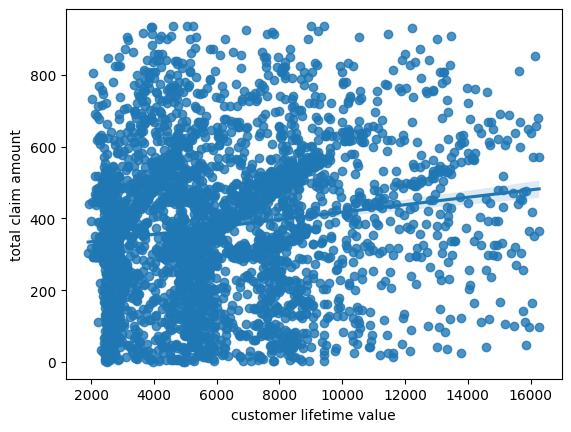

income


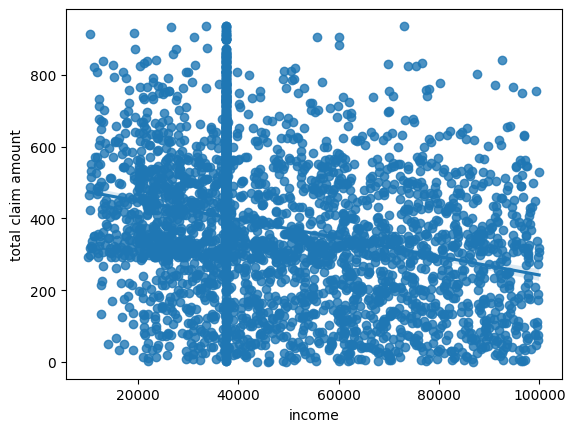

monthly premium auto


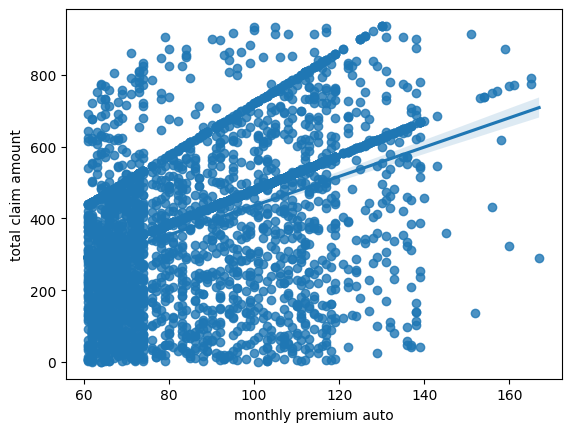

months since last claim


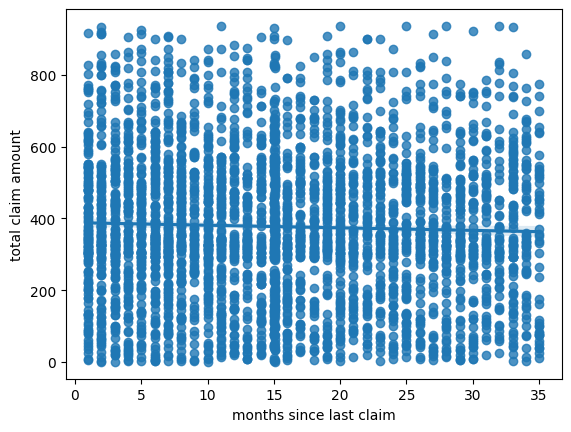

months since policy inception


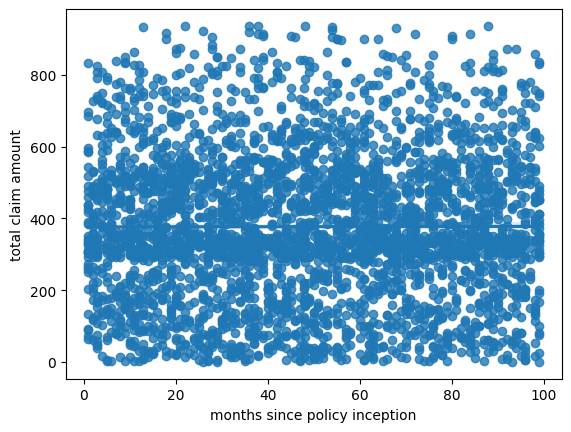

number of open complaints


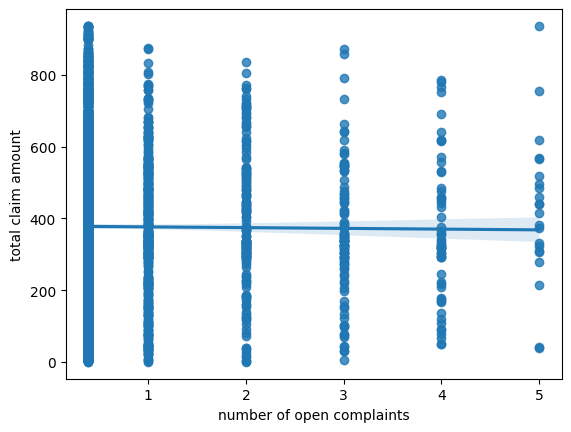

number of policies


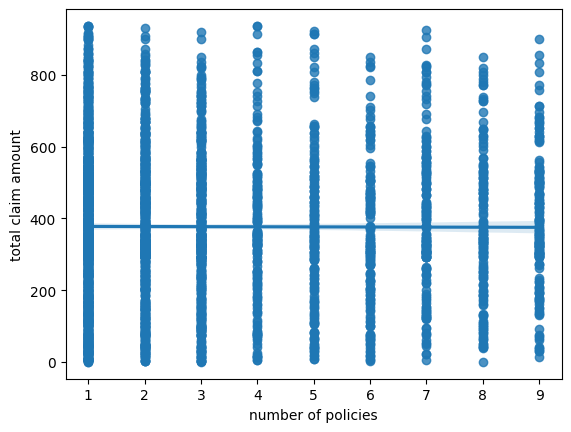

total claim amount


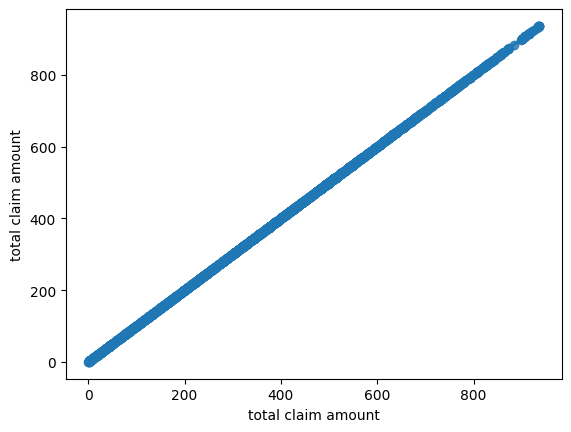

effective to date: month


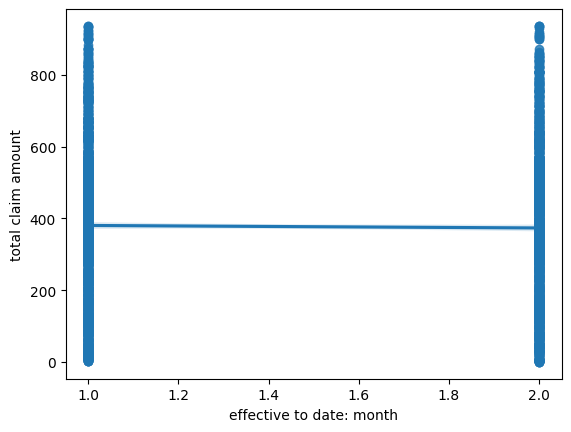

In [82]:
for column in df_final.columns:
    print(column)
    sns.regplot(data = df_final, x =column, y="total claim amount") ## noting that "total_claim_amount" is  the target variable.
    plt.show()


In [83]:
categorical.head()

customer       state response  coverage             education  \
2   LZ68649  Washington       No     Basic              Bachelor   
3   XL78013      Oregon      Yes  Extended               College   
10  HG93801     Arizona       No  Extended  High School or Below   
13  KR82385  California       No     Basic                Master   
16  FH51383  California       No     Basic  High School or Below   

   employmentstatus gender location code marital status     policy type  \
2          Employed      M      Suburban         Single   Personal Auto   
3          Employed      M      Suburban         Single  Corporate Auto   
10         Employed      M         Urban        Married  Corporate Auto   
13         Employed      M      Suburban         Single   Personal Auto   
16         Employed      F         Urban        Married   Personal Auto   

          policy renew offer type sales channel  vehicle class vehicle size  \
2    Personal L3           Offer3   Call Center            SUV      Medsize   
3   Corporate L3           Offer2        Branch  Four-Door Car      Medsize   
10  Corporate L3           Offer2        Branch            SUV        Large   
13   Personal L3           Offer4   Call Center   Two-Door Car      Medsize   
16   Personal L3           Offer4   Call Center   Two-Door Car        Large   

   vehicle type  
2             A  
3             A  
10            A  
13            A  
16            A

In [84]:
numerical.head()

customer lifetime value   income  monthly premium auto  \
2              14947.917300  22139.0                 100.0   
3              22332.439460  49078.0                  97.0   
10              5154.764074  82730.0                 127.0   
13              5454.587929  66334.0                  69.0   
16              5326.677654  76717.0                  66.0   

    months since last claim  months since policy inception  \
2                      34.0                           31.0   
3                      10.0                            3.0   
10                     13.0                           31.0   
13                     25.0                           25.0   
16                     26.0                           10.0   

    number of open complaints  number of policies  total claim amount  \
2                    0.386309                 2.0          480.000000   
3                    0.386309                 2.0          484.013411   
10                   0.386309                 1.0          442.521087   
13                   0.386309                 4.0          331.200000   
16                   0.386309                 6.0          300.528579   

    effective to date: month  
2                          2  
3                          1  
10                         1  
13                         1  
16                         2

In [85]:
df_final.shape ## Our dataframe "df_final" is considering only the numerical variables

(3488, 9)

In [86]:
## Modeling the target variable ("total_claim_amount") with the explanatory variables (the variables)
    ## step 1. train, test split
    ## step 2. Transform the variables for the model 
        ## 2.1. Numerical variables need to be transformed (e.g. Standard Scaler)
        ##  (x - mean(x)) /std(x)
        ## 2.2. the categorical variables need to be encoded: dummification
    ## step 3. evaluate the model: we calculate the error the model


In [87]:
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size', 'vehicle type'],
      dtype='object')

In [89]:
categorical.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4543 entries, 2 to 10908
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer          4543 non-null   object
 1   state             4543 non-null   object
 2   response          4543 non-null   object
 3   coverage          4543 non-null   object
 4   education         4543 non-null   object
 5   employmentstatus  4543 non-null   object
 6   gender            4543 non-null   object
 7   location code     4543 non-null   object
 8   marital status    4543 non-null   object
 9   policy type       4543 non-null   object
 10  policy            4543 non-null   object
 11  renew offer type  4543 non-null   object
 12  sales channel     4543 non-null   object
 13  vehicle class     4543 non-null   object
 14  vehicle size      4543 non-null   object
 15  vehicle type      4543 non-null   object
dtypes: object(16)
memory usage: 603.4+ KB


In [90]:
categorical[categorical.duplicated()]

Empty DataFrame
Columns: [customer, state, response, coverage, education, employmentstatus, gender, location code, marital status, policy type, policy, renew offer type, sales channel, vehicle class, vehicle size, vehicle type]
Index: []

In [91]:
categorical['total claim amount'] = numerical['total claim amount'] ## Adding the target variable "total_claim_amount" to the dataset "categorical"
categorical.head(5)

customer       state response  coverage             education  \
2   LZ68649  Washington       No     Basic              Bachelor   
3   XL78013      Oregon      Yes  Extended               College   
10  HG93801     Arizona       No  Extended  High School or Below   
13  KR82385  California       No     Basic                Master   
16  FH51383  California       No     Basic  High School or Below   

   employmentstatus gender location code marital status     policy type  \
2          Employed      M      Suburban         Single   Personal Auto   
3          Employed      M      Suburban         Single  Corporate Auto   
10         Employed      M         Urban        Married  Corporate Auto   
13         Employed      M      Suburban         Single   Personal Auto   
16         Employed      F         Urban        Married   Personal Auto   

          policy renew offer type sales channel  vehicle class vehicle size  \
2    Personal L3           Offer3   Call Center            SUV      Medsize   
3   Corporate L3           Offer2        Branch  Four-Door Car      Medsize   
10  Corporate L3           Offer2        Branch            SUV        Large   
13   Personal L3           Offer4   Call Center   Two-Door Car      Medsize   
16   Personal L3           Offer4   Call Center   Two-Door Car        Large   

   vehicle type  total claim amount  
2             A          480.000000  
3             A          484.013411  
10            A          442.521087  
13            A          331.200000  
16            A          300.528579

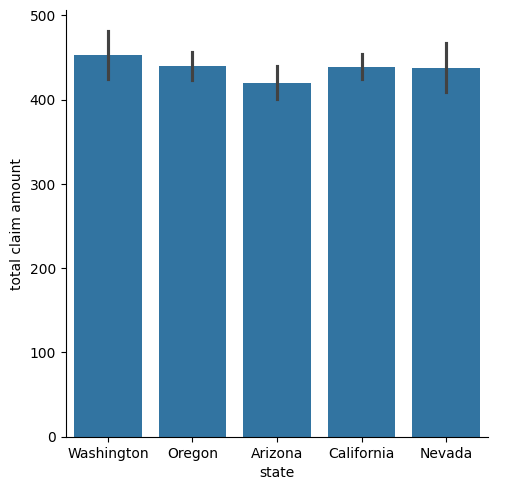

In [92]:
sns.catplot(x="state", y="total claim amount", data = categorical, kind ="bar") 
plt.show()

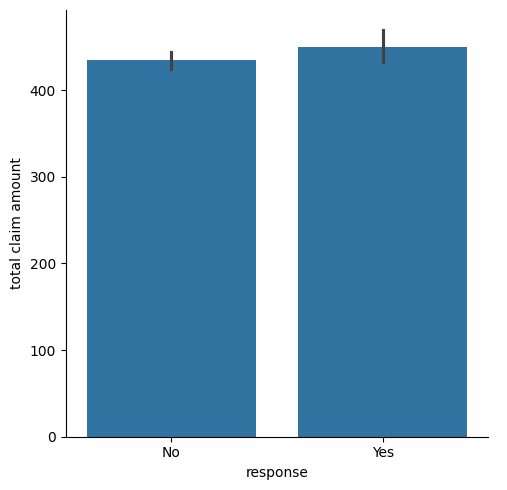

In [93]:
sns.catplot(x="response", y="total claim amount", data = categorical, kind ="bar") 
plt.show()

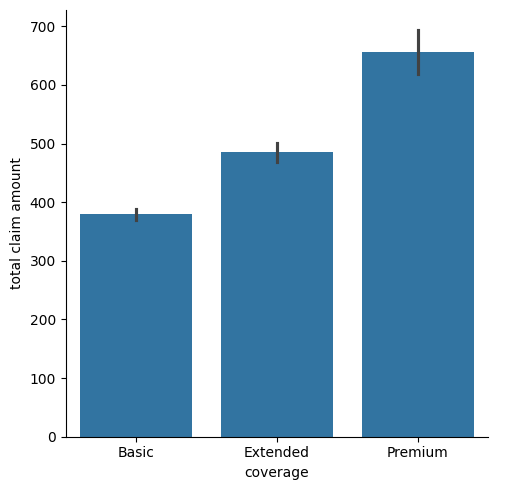

In [94]:

sns.catplot(x="coverage", y="total claim amount", data = categorical, kind ="bar") 
plt.show()

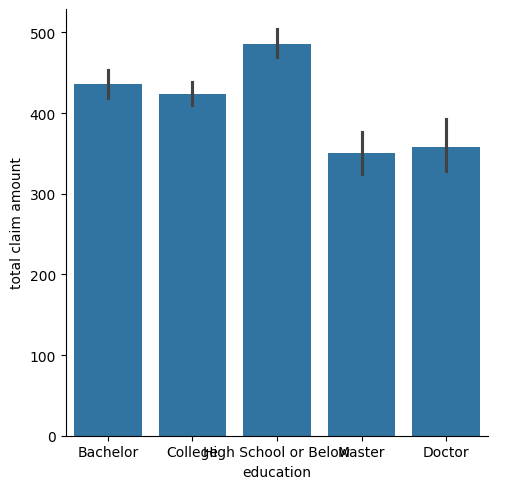

In [95]:

sns.catplot(x="education", y="total claim amount", data = categorical, kind ="bar")
plt.show() 

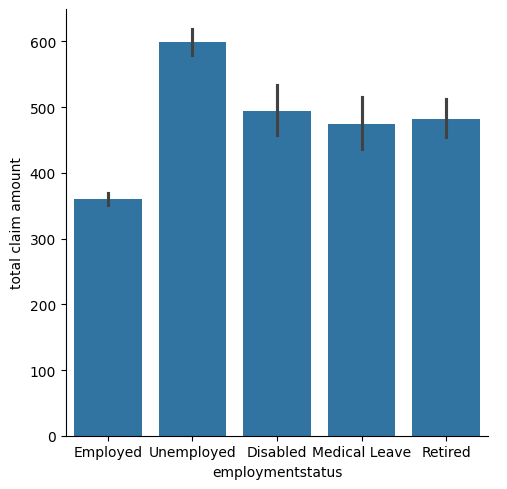

In [96]:
sns.catplot(x="employmentstatus", y="total claim amount", data = categorical, kind ="bar")
plt.show() 

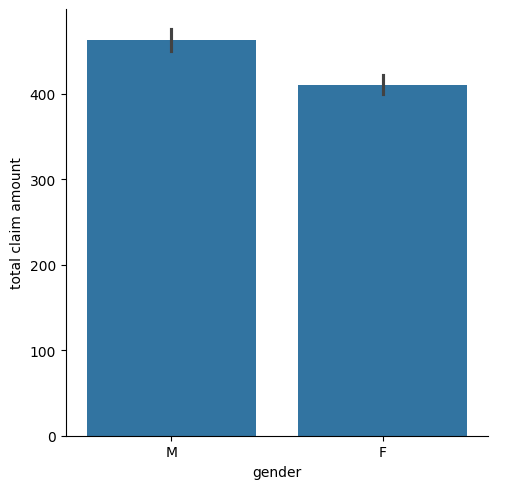

In [97]:
sns.catplot(x="gender", y="total claim amount", data = categorical, kind ="bar") 
plt.show() 

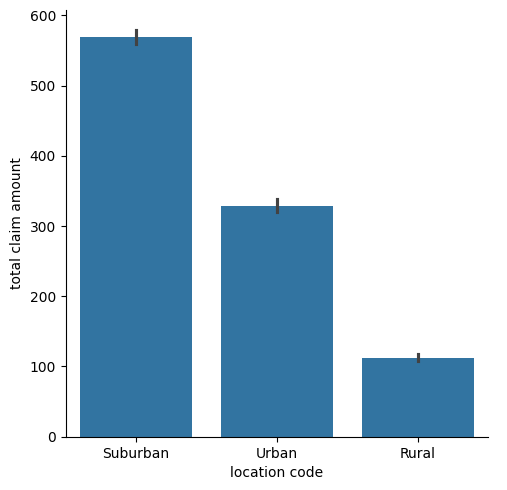

In [98]:
sns.catplot(x="location code", y="total claim amount", data = categorical, kind ="bar") 
plt.show() 

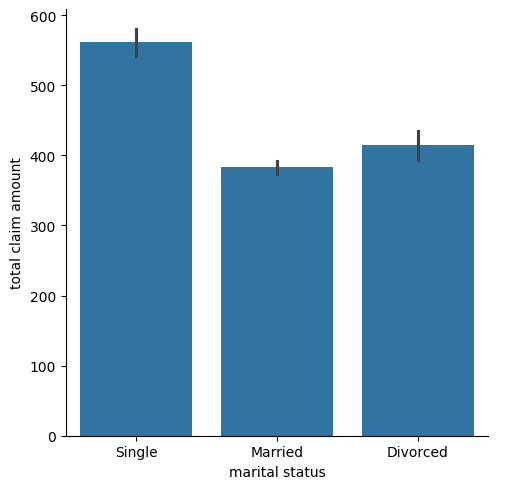

In [99]:
sns.catplot(x="marital status", y="total claim amount", data = categorical, kind ="bar") 
plt.show() 

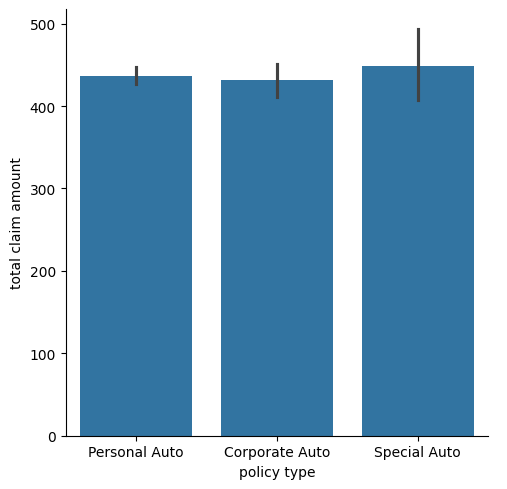

In [100]:
sns.catplot(x="policy type", y="total claim amount", data = categorical, kind ="bar")
plt.show() 

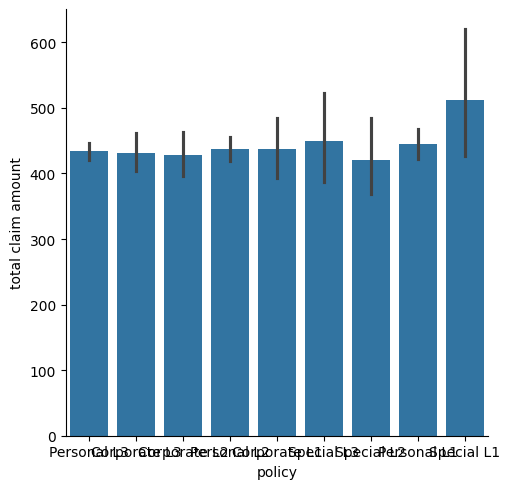

In [101]:
sns.catplot(x="policy", y="total claim amount", data = categorical, kind ="bar") 
plt.show() 

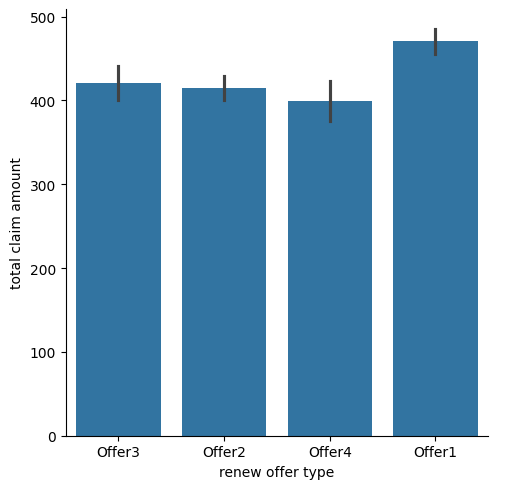

In [102]:
sns.catplot(x="renew offer type", y="total claim amount", data = categorical, kind ="bar") # kind = le type de bar que l'on souhaite 
plt.show() 

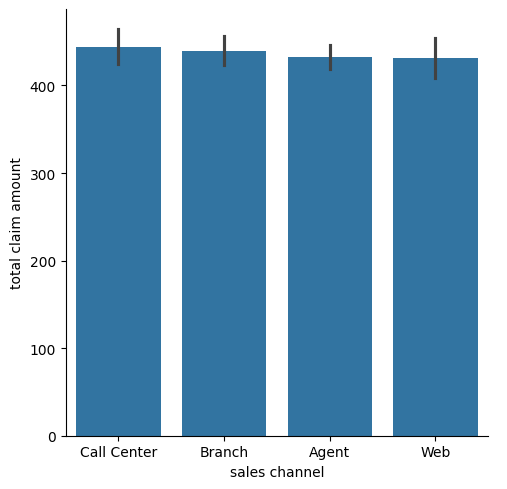

In [103]:
sns.catplot(x="sales channel", y="total claim amount", data = categorical, kind ="bar") # kind = le type de bar que l'on souhaite 
plt.show() 

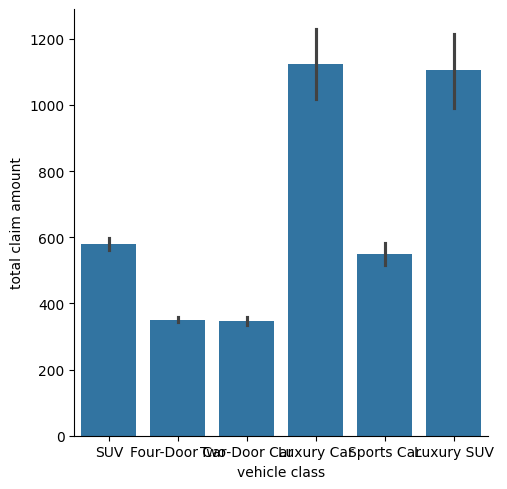

In [104]:
sns.catplot(x="vehicle class", y="total claim amount", data = categorical, kind ="bar") # kind = le type de bar que l'on souhaite 
plt.show() 

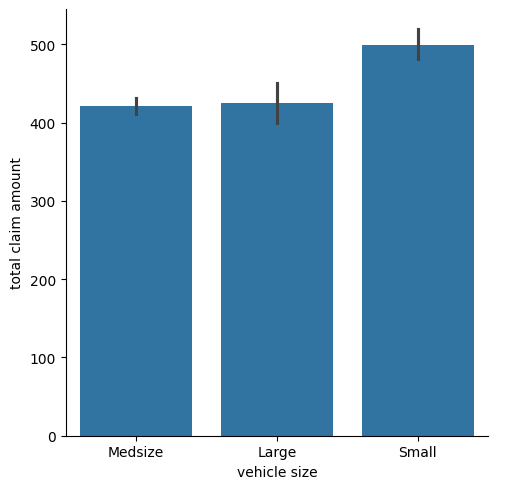

In [105]:
sns.catplot(x="vehicle size", y="total claim amount", data = categorical, kind ="bar") # kind = le type de bar que l'on souhaite 
plt.show() 

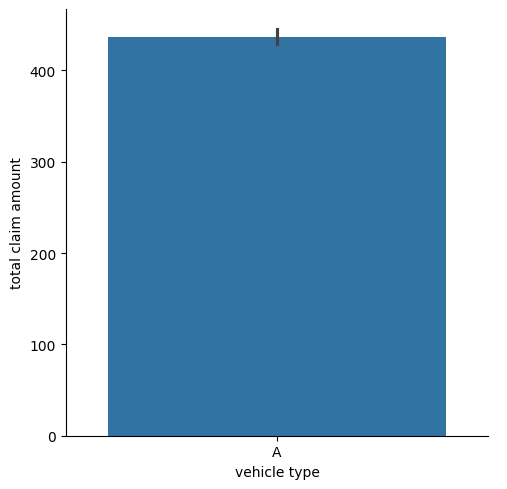

In [106]:
sns.catplot(x="vehicle type", y="total claim amount", data = categorical, kind ="bar") # kind = le type de bar que l'on souhaite 
plt.show() 

In [107]:
## X-y split

In [108]:
df_final.shape ## Our dataframe "df_final" is considering only the numerical variables

(3488, 9)

In [109]:
X = numerical.drop(['total claim amount'], axis=1)
X.head(5)

customer lifetime value   income  monthly premium auto  \
2              14947.917300  22139.0                 100.0   
3              22332.439460  49078.0                  97.0   
10              5154.764074  82730.0                 127.0   
13              5454.587929  66334.0                  69.0   
16              5326.677654  76717.0                  66.0   

    months since last claim  months since policy inception  \
2                      34.0                           31.0   
3                      10.0                            3.0   
10                     13.0                           31.0   
13                     25.0                           25.0   
16                     26.0                           10.0   

    number of open complaints  number of policies  effective to date: month  
2                    0.386309                 2.0                         2  
3                    0.386309                 2.0                         1  
10                   0.386309                 1.0                         1  
13                   0.386309                 4.0                         1  
16                   0.386309                 6.0                         2

In [110]:
## Concat data frames

X['location code']= categorical['location code']  ## Adding the categorical variable "location code" to the explanatory variables
X.head(5)

customer lifetime value   income  monthly premium auto  \
2              14947.917300  22139.0                 100.0   
3              22332.439460  49078.0                  97.0   
10              5154.764074  82730.0                 127.0   
13              5454.587929  66334.0                  69.0   
16              5326.677654  76717.0                  66.0   

    months since last claim  months since policy inception  \
2                      34.0                           31.0   
3                      10.0                            3.0   
10                     13.0                           31.0   
13                     25.0                           25.0   
16                     26.0                           10.0   

    number of open complaints  number of policies  effective to date: month  \
2                    0.386309                 2.0                         2   
3                    0.386309                 2.0                         1   
10                   0.386309                 1.0                         1   
13                   0.386309                 4.0                         1   
16                   0.386309                 6.0                         2   

   location code  
2       Suburban  
3       Suburban  
10         Urban  
13      Suburban  
16         Urban

In [111]:
# dummify the categorical variable(s)

X = pd.get_dummies(X, drop_first=True) ## the option drop first=True is dropping one of the columns ("location code_Rural") ensuring that noise is not passed to the model. This is a good practice to avoid overfitting
X.head(5)

customer lifetime value   income  monthly premium auto  \
2              14947.917300  22139.0                 100.0   
3              22332.439460  49078.0                  97.0   
10              5154.764074  82730.0                 127.0   
13              5454.587929  66334.0                  69.0   
16              5326.677654  76717.0                  66.0   

    months since last claim  months since policy inception  \
2                      34.0                           31.0   
3                      10.0                            3.0   
10                     13.0                           31.0   
13                     25.0                           25.0   
16                     26.0                           10.0   

    number of open complaints  number of policies  effective to date: month  \
2                    0.386309                 2.0                         2   
3                    0.386309                 2.0                         1   
10                   0.386309                 1.0                         1   
13                   0.386309                 4.0                         1   
16                   0.386309                 6.0                         2   

    location code_Suburban  location code_Urban  
2                     True                False  
3                     True                False  
10                   False                 True  
13                    True                False  
16                   False                 True

In [112]:
y = numerical['total claim amount']
y.head(5)

2     480.000000
3     484.013411
10    442.521087
13    331.200000
16    300.528579
Name: total claim amount, dtype: float64

In [113]:
## from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [114]:
display(X_train)
display(X_test)

customer lifetime value        income  monthly premium auto  \
6747              22620.748410  49564.000000                 193.0   
10016              7573.336505  87615.000000                  94.0   
4538               3803.798530  26050.000000                  97.0   
5367              11360.464960  37453.033238                 104.0   
8607              14514.005190  88753.000000                 181.0   
...                        ...           ...                   ...   
2587               8467.369513  37453.033238                 122.0   
7973               3534.337809  19861.000000                  93.0   
4035               4627.090729  29124.000000                 129.0   
6400               4076.634665  29549.000000                 104.0   
6710               2435.321545  43721.000000                  61.0   

       months since last claim  months since policy inception  \
6747                      22.0                           82.0   
10016                     35.0                           63.0   
4538                       4.0                           51.0   
5367                      29.0                            7.0   
8607                       6.0                           21.0   
...                        ...                            ...   
2587                       2.0                           73.0   
7973                      27.0                           21.0   
4035                      15.0                           41.0   
6400                      17.0                           51.0   
6710                       5.0                           84.0   

       number of open complaints  number of policies  \
6747                    0.386309                 2.0   
10016                   0.386309                 3.0   
4538                    0.386309                 1.0   
5367                    0.386309                 2.0   
8607                    0.386309                 3.0   
...                          ...                 ...   
2587                    0.386309                 5.0   
7973                    0.386309                 1.0   
4035                    4.000000                 1.0   
6400                    0.386309                 1.0   
6710                    0.386309                 1.0   

       effective to date: month  location code_Suburban  location code_Urban  
6747                          1                   False                False  
10016                         1                    True                False  
4538                          1                    True                False  
5367                          1                    True                False  
8607                          2                    True                False  
...                         ...                     ...                  ...  
2587                          1                    True                False  
7973                          1                    True                False  
4035                          1                    True                False  
6400                          1                    True                False  
6710                          2                    True                False  

[3634 rows x 10 columns]

customer lifetime value        income  monthly premium auto  \
5911              2580.849899  46900.000000                  66.0   
7729              2886.451602  10312.000000                  78.0   
5025              2478.833596  81721.000000                  63.0   
6967              2467.129805  23845.000000                  61.0   
5161              5794.682724  52979.000000                  72.0   
...                       ...           ...                   ...   
988               2965.719950  26472.000000                  74.0   
7333              5066.634057  35596.000000                  64.0   
1336             22103.507200  37453.033238                 102.0   
3104              9011.129467  88708.000000                 112.0   
6054              7556.240340  35257.000000                  98.0   

      months since last claim  months since policy inception  \
5911                     13.0                           59.0   
7729                     10.0                           63.0   
5025                     11.0                            5.0   
6967                     33.0                           34.0   
5161                     14.0                           53.0   
...                       ...                            ...   
988                      22.0                           31.0   
7333                     11.0                           92.0   
1336                     35.0                           48.0   
3104                      6.0                           71.0   
6054                     16.0                            2.0   

      number of open complaints  number of policies  effective to date: month  \
5911                   0.386309                 1.0                         2   
7729                   0.386309                 1.0                         1   
5025                   0.386309                 1.0                         1   
6967                   0.386309                 1.0                         1   
5161                   0.386309                 4.0                         2   
...                         ...                 ...                       ...   
988                    0.386309                 1.0                         2   
7333                   0.386309                 3.0                         1   
1336                   0.386309                 2.0                         1   
3104                   0.386309                 9.0                         1   
6054                   1.000000                 8.0                         2   

      location code_Suburban  location code_Urban  
5911                    True                False  
7729                    True                False  
5025                   False                False  
6967                    True                False  
5161                    True                False  
...                      ...                  ...  
988                     True                False  
7333                    True                False  
1336                    True                False  
3104                   False                 True  
6054                    True                False  

[909 rows x 10 columns]

In [115]:
len(X_train)/len(X)

0.7999119524543253

In [116]:
len(X_test)/len(X)

0.20008804754567466

In [117]:
# scaling the numerical variables. Standardisation Scaling is a method used to NORMALIZE the range of independent variables or features of data. 

## from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [118]:
scaler

StandardScaler()

In [119]:
## Lab | Customer Analysis Round 6
    ## further processing Data
    ## Linear Regression (Train-test split; Apply linear regression)
    ## Model Validation (R2, MSE, RMSE, MAE)

In [120]:
## Fit transform the data with the scaler

X_train = scaler.fit_transform(X_train)

# x_train = (X_train - mean(X_train))/std(X_train) also storing the mean(x_train), std(x_train)

X_test = scaler.transform(X_test)

# x_test = (X_test -mean(X_train))/(std(X_train))

In [121]:
## Create the Linear Regression with sklearn

## from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 

regressor.fit(X_train, y_train)

LinearRegression()

In [122]:
# Get the coefficients of the model (b1, b2, b3,......)

regressor.coef_

array([ -8.38793521, -12.86699528, 176.55849166,   4.3319745 ,
         0.56314832,  -2.11257093,   3.49943606,   2.33584645,
       203.04826266,  82.24036536])

In [123]:
regressor.intercept_  #bo

437.0000192589434

In [124]:
## "Total claim amount": y= b0 + b1 X1 + b2 X2 + b3 X3 + b4 X4 + b5 X5 .................

In [125]:
## performance-measuring functions 
## r2 score

print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))

train set score 0.7320491652644995
test set score 0.7481685642420943


In [126]:
## from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [127]:
predictions_trainset = regressor.predict(X_train)
predictions_testset = regressor.predict(X_test)

In [128]:
## mean absolute error (MAE)    ## MAE represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
## mean squared error (MSE)     ## MSE quantifies how close a predicted value is to the true value.
## Root mean square deviation (RMSE)    ## RMSE is the square root of Mean Squared error. It measures the standard deviation of residuals. 
## r2 score     ## goodness of fit measures, which summarize how well a model fits a set of data.

In [129]:
## Train
rmse = mean_squared_error(y_train,predictions_trainset)
mae = mean_absolute_error(y_train,predictions_trainset)
r2 = r2_score(y_train,predictions_trainset)
print(rmse, mae, r2)

23438.189118182538 108.17948304333407 0.7320491652644995


In [130]:
## Test
rmse = mean_squared_error(y_test,predictions_testset)
mae = mean_absolute_error(y_test,predictions_testset)
r2 = r2_score(y_test,predictions_testset)
print(rmse, mae, r2)

21460.182784661567 107.20095352759527 0.7481685642420943


In [131]:
## Lab | Customer Analysis Round 7
## Follow the steps as shown in previous lectures and try to improve the accuracy of the model (linear regression model). Include both categorical columns in the exercise. Some approaches you can try in this exercise are:
    ## use the concept of multicollinearity and remove insignificant variables
    ## use a different method of scaling the numerical variables
    ## use a different ratio of train test split
    ## use the transformation on numerical columns which align it more towards a normal distribution

In [133]:
scaler

StandardScaler()

In [143]:
## use a different method of scaling the numerical variables
## from sklearn.preprocessing import MinMaxScaler
scaler2 = MinMaxScaler()

In [144]:
X_train = scaler2.fit_transform(X_train)
X_test = scaler2.transform(X_test)

regressor = LinearRegression() 
regressor.fit(X_train, y_train)

LinearRegression()

In [145]:
regressor.coef_

array([ -97.04535159,  -53.42720319, 1193.01687252,   15.14296159,
          1.99248346,  -12.37618967,   11.78431789,    4.67850271,
        419.64666108,  216.16665891])

In [146]:
regressor.intercept_  #bo

-11.244573124814622

In [147]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))

train set score 0.7320491652644995
test set score 0.7481685642420943


In [ ]:
## We tried to use the scale MinMaxScaler (instead of StandardScaler) above, however the r2 performance score are the same

In [148]:
## use a different ratio of train test split (test size = 10%)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=0)


In [150]:
len(X_train)/len(X)

0.8998459167950693

In [149]:
display(X_train)
display(X_test)


customer lifetime value        income  monthly premium auto  \
2400              7462.926263  70263.000000                  93.0   
4303             38496.947010  48409.000000                 124.0   
8874             12547.428880  32857.000000                 105.0   
9349             40224.013590  48587.000000                 111.0   
6263             15610.900650  37453.033238                 119.0   
...                       ...           ...                   ...   
2587              8467.369513  37453.033238                 122.0   
7973              3534.337809  19861.000000                  93.0   
4035              4627.090729  29124.000000                 129.0   
6400              4076.634665  29549.000000                 104.0   
6710              2435.321545  43721.000000                  61.0   

      months since last claim  months since policy inception  \
2400                     30.0                           66.0   
4303                     13.0                           60.0   
8874                     24.0                           15.0   
9349                      7.0                           14.0   
6263                      3.0                           52.0   
...                       ...                            ...   
2587                      2.0                           73.0   
7973                     27.0                           21.0   
4035                     15.0                           41.0   
6400                     17.0                           51.0   
6710                      5.0                           84.0   

      number of open complaints  number of policies  effective to date: month  \
2400                   0.386309                 5.0                         1   
4303                   0.386309                 2.0                         2   
8874                   0.386309                 2.0                         1   
9349                   0.386309                 2.0                         2   
6263                   5.000000                 2.0                         1   
...                         ...                 ...                       ...   
2587                   0.386309                 5.0                         1   
7973                   0.386309                 1.0                         1   
4035                   4.000000                 1.0                         1   
6400                   0.386309                 1.0                         1   
6710                   0.386309                 1.0                         2   

      location code_Suburban  location code_Urban  
2400                   False                False  
4303                   False                 True  
8874                    True                False  
9349                    True                False  
6263                   False                 True  
...                      ...                  ...  
2587                    True                False  
7973                    True                False  
4035                    True                False  
6400                    True                False  
6710                    True                False  

[4088 rows x 10 columns]

customer lifetime value   income  monthly premium auto  \
5911              2580.849899  46900.0                  66.0   
7729              2886.451602  10312.0                  78.0   
5025              2478.833596  81721.0                  63.0   
6967              2467.129805  23845.0                  61.0   
5161              5794.682724  52979.0                  72.0   
...                       ...      ...                   ...   
8564             17484.534380  78362.0                  73.0   
9563              4144.868939  64478.0                 103.0   
2989              6991.248087  19019.0                 186.0   
3056              5294.283790  61687.0                  67.0   
5160              2927.516316  20852.0                  73.0   

      months since last claim  months since policy inception  \
5911                     13.0                           59.0   
7729                     10.0                           63.0   
5025                     11.0                            5.0   
6967                     33.0                           34.0   
5161                     14.0                           53.0   
...                       ...                            ...   
8564                     16.0                           66.0   
9563                     30.0                           92.0   
2989                      7.0                           46.0   
3056                     13.0                           17.0   
5160                      8.0                            6.0   

      number of open complaints  number of policies  effective to date: month  \
5911                   0.386309                 1.0                         2   
7729                   0.386309                 1.0                         1   
5025                   0.386309                 1.0                         1   
6967                   0.386309                 1.0                         1   
5161                   0.386309                 4.0                         2   
...                         ...                 ...                       ...   
8564                   0.386309                 2.0                         1   
9563                   0.386309                 1.0                         1   
2989                   0.386309                 1.0                         2   
3056                   0.386309                 3.0                         1   
5160                   0.386309                 1.0                         2   

      location code_Suburban  location code_Urban  
5911                    True                False  
7729                    True                False  
5025                   False                False  
6967                    True                False  
5161                    True                False  
...                      ...                  ...  
8564                    True                False  
9563                   False                False  
2989                    True                False  
3056                   False                False  
5160                    True                False  

[455 rows x 10 columns]

In [151]:
scaler = StandardScaler() 

In [152]:
scaler

StandardScaler()

In [153]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [154]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)


LinearRegression()

In [155]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))


train set score 0.7323691059041764
test set score 0.7640295240960662


In [156]:
## use a different ratio of train test split (test size = 25%)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [157]:
scaler = StandardScaler() 

In [158]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [159]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)


LinearRegression()

In [160]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))


train set score 0.732820025458589
test set score 0.7421912129593313


In [161]:
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'total claim amount',
       'effective to date: month'],
      dtype='object')

In [163]:
## remove 2 additional explanatory variables, as they should be insignicant.

X = numerical.drop(['total claim amount', 'customer lifetime value','effective to date: month'], axis=1)
X.head(5)

income  monthly premium auto  months since last claim  \
2   22139.0                 100.0                     34.0   
3   49078.0                  97.0                     10.0   
10  82730.0                 127.0                     13.0   
13  66334.0                  69.0                     25.0   
16  76717.0                  66.0                     26.0   

    months since policy inception  number of open complaints  \
2                            31.0                   0.386309   
3                             3.0                   0.386309   
10                           31.0                   0.386309   
13                           25.0                   0.386309   
16                           10.0                   0.386309   

    number of policies  
2                  2.0  
3                  2.0  
10                 1.0  
13                 4.0  
16                 6.0

In [164]:
X['location code']= categorical['location code']  ## Adding the categorical variable "location code" to the explanatory variables
X.head(5)


income  monthly premium auto  months since last claim  \
2   22139.0                 100.0                     34.0   
3   49078.0                  97.0                     10.0   
10  82730.0                 127.0                     13.0   
13  66334.0                  69.0                     25.0   
16  76717.0                  66.0                     26.0   

    months since policy inception  number of open complaints  \
2                            31.0                   0.386309   
3                             3.0                   0.386309   
10                           31.0                   0.386309   
13                           25.0                   0.386309   
16                           10.0                   0.386309   

    number of policies location code  
2                  2.0      Suburban  
3                  2.0      Suburban  
10                 1.0         Urban  
13                 4.0      Suburban  
16                 6.0         Urban

In [165]:
# dummify the categorical variable(s)

X = pd.get_dummies(X, drop_first=True) ## the option drop first=True is dropping one of the columns ("location code_Rural") ensuring that noise is not passed to the model. This is a good practice to avoid overfitting
X.head(5)


income  monthly premium auto  months since last claim  \
2   22139.0                 100.0                     34.0   
3   49078.0                  97.0                     10.0   
10  82730.0                 127.0                     13.0   
13  66334.0                  69.0                     25.0   
16  76717.0                  66.0                     26.0   

    months since policy inception  number of open complaints  \
2                            31.0                   0.386309   
3                             3.0                   0.386309   
10                           31.0                   0.386309   
13                           25.0                   0.386309   
16                           10.0                   0.386309   

    number of policies  location code_Suburban  location code_Urban  
2                  2.0                    True                False  
3                  2.0                    True                False  
10                 1.0                   False                 True  
13                 4.0                    True                False  
16                 6.0                   False                 True

In [166]:
y = numerical['total claim amount']
y.head(5)


2     480.000000
3     484.013411
10    442.521087
13    331.200000
16    300.528579
Name: total claim amount, dtype: float64

In [167]:
## from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [169]:
len(X_train)/len(X)

0.7999119524543253

In [170]:
scaler = StandardScaler() 

In [171]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [172]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)


LinearRegression()

In [173]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))


train set score 0.7313208605519028
test set score 0.748699313614334


In [ ]:
## The results of r2 scores above are not better than them before, even though few insignificant explanatory variables were removed

In [ ]:
## Lab | Customer Analysis Final Round
    ## For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.
    ## It's time to put it all together. Remember the previous rounds and follow the steps as shown in previous lectures.
## ## 01 - Problem (case study)
    # Data Description.
    Goal.
## 02 - Getting Data
    # Read the .csv file.
## 03 - Cleaning/Wrangling/EDA
    # Change headers names.
    # Deal with NaN values.
    # Categorical Features.
    # Numerical Features.
    # Exploration.
## 04 - Processing Data
    # Dealing with outliers.
    # Normalization.
    # Encoding Categorical Data.
    # Splitting into train set and test set.
## 05 - Modeling
    # Apply model.
## 06 - Model Validation
    # R2.
    # MSE.
    # RMSE.
    # MAE.
## 07 - Reporting
    # Present results.

In [174]:
X.head(5)

income  monthly premium auto  months since last claim  \
2   22139.0                 100.0                     34.0   
3   49078.0                  97.0                     10.0   
10  82730.0                 127.0                     13.0   
13  66334.0                  69.0                     25.0   
16  76717.0                  66.0                     26.0   

    months since policy inception  number of open complaints  \
2                            31.0                   0.386309   
3                             3.0                   0.386309   
10                           31.0                   0.386309   
13                           25.0                   0.386309   
16                           10.0                   0.386309   

    number of policies  location code_Suburban  location code_Urban  
2                  2.0                    True                False  
3                  2.0                    True                False  
10                 1.0                   False                 True  
13                 4.0                    True                False  
16                 6.0                   False                 True

In [175]:
y.head(5)

2     480.000000
3     484.013411
10    442.521087
13    331.200000
16    300.528579
Name: total claim amount, dtype: float64

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=200)   ## for this case, we will check the results considering random_state=200 (instead of 0)

In [243]:
len(X_train)/len(X)

0.7999119524543253

In [244]:
scaler = StandardScaler() 

In [245]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [246]:
regressor = LinearRegression() 
regressor.fit(X_train, y_train)


LinearRegression()

In [248]:
print("train set score", regressor.score(X_train, y_train))
print("test set score", regressor.score(X_test, y_test))


train set score 0.7304423576445624
test set score 0.7511042128122781


In [ ]:
After we changed the random_state to 200, the r2 score is a bit better than before.

## random_state: Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls